# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
# Importing Deep Learning Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, Activation, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file, so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

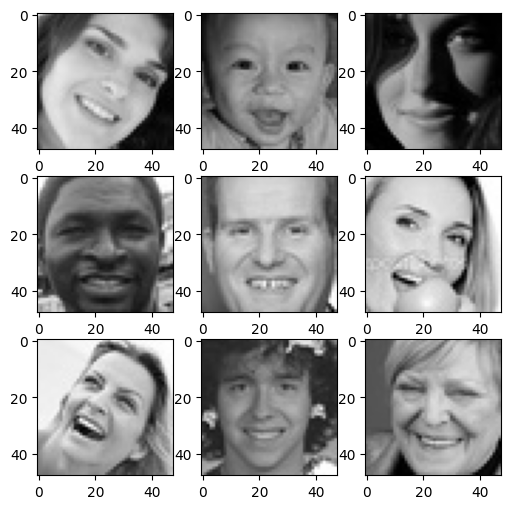

In [5]:
# Visualizing happy facial emotion
emotion_type = 'happy'

plt.figure(figsize = (6, 6))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" + 
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img) 
    
plt.show()

**Observations and Insights:The dataset contains 4 types of facial emotions (happy, neutral, sad and surprise).All the images are in the grayscale.On visual inspection, for most of the happy face images, we can see the teeth and fluffy (pushed up) cheeks.**

### **Sad**

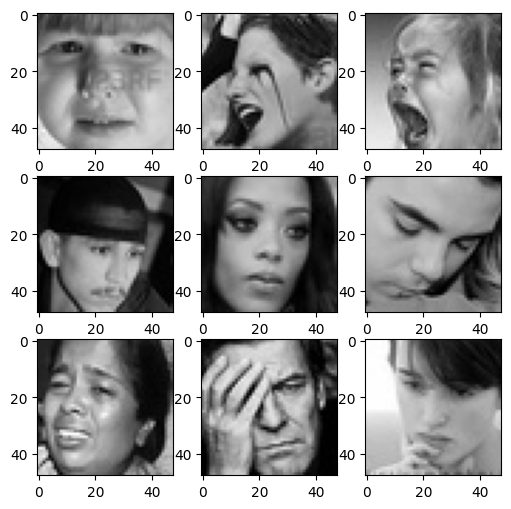

In [6]:
# Visualizing sad facial emotion
emotion_type = 'sad'

plt.figure(figsize = (6, 6))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" + 
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img) 
    
plt.show()

**Observations and Insights:Sad images have slightly pulled down of lips in the corners, wrinkles in the forehead and inner corner of the eyebrows close to each other.**

### **Neutral**

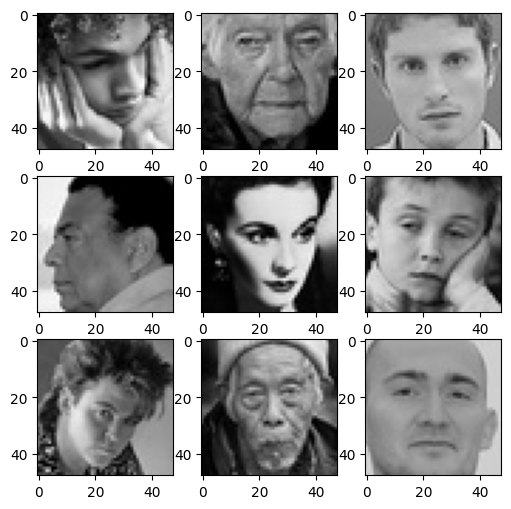

In [7]:
# Visualizing neutral facial emotion
emotion_type = 'neutral'

plt.figure(figsize = (6, 6))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" + 
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img) 
    
plt.show()

**Observations and Insights:Neutral images contain mixed features: some shows happy face and some has widened closed lips.**

### **Surprised**

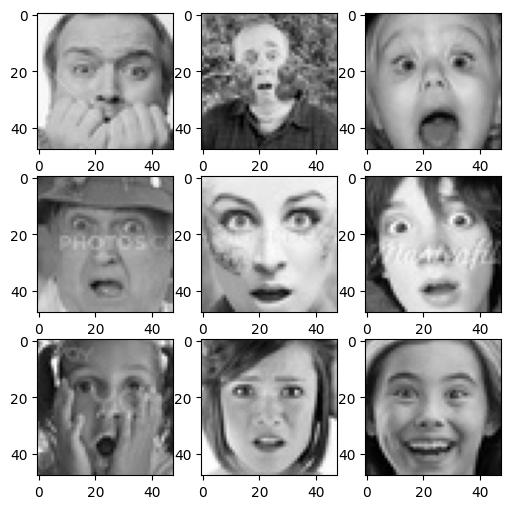

In [8]:
# Visualizing surprise facial emotion
emotion_type = 'surprise'

plt.figure(figsize = (6, 6))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + emotion_type + "/" + 
                  os.listdir(folder_path + "train/" + emotion_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img) 
    
plt.show()

**Observations and Insights:Surprise images have open mouths or raised eyebrows or circular eyeballs (eyes widened).**

## **Checking Distribution of Classes**

In [9]:
# Checking the distribution of each class in the training folder.
# Number of happy images in the training folder
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of happy images in the training set':   ", num_happy)

Number of happy images in the training set':    3976


In [10]:
# Number of sad images in the training folder
num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of sad images in the in the training set:   ", num_sad)

Number of sad images in the in the training set:    3982


In [11]:
# Number of neutral images in the training folder
num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of neutral images in the in the training set:   ", num_neutral)

Number of neutral images in the in the training set:    3978


In [12]:
# Number of surprise images in the training folder
num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of surprise images in the in the training set:", num_surprise)

Number of surprise images in the in the training set: 3173


<Axes: xlabel='Class distribution', ylabel='Number of images'>

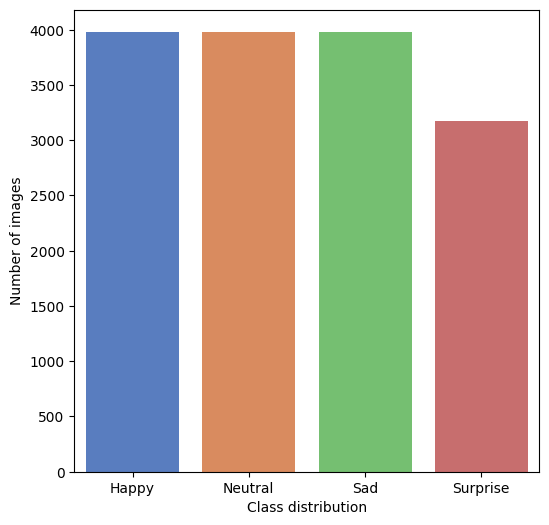

In [13]:
# Code to plot histogram
Total_training_images = num_happy+num_neutral+num_sad+num_surprise
plt.figure(figsize = (6, 6))
df = pd.DataFrame({'Class distribution':['Happy', 'Neutral', 'Sad','Surprise'], 'Number of images':[num_happy, num_neutral, num_sad,num_surprise]})
sns.barplot(data=df, x='Class distribution', y='Number of images',palette ='muted')
#plt.axhline(Total_training_images/4,color='red',linestyle='--')

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Observations and Insights:Class distributions are not equally distributed.Total number of images of the 3 classes (Happy:3976, Neutral:3978, Sad:3982) are almost same in the training dataset. However, there is 3173 surprise images in the training dataset.**

In [14]:
# Generating the frequency of distribution for each class to check the balace/imbalance dataset
Total_training_images = num_happy+num_neutral+num_sad+num_surprise
print("Total number of images in the in the training set:   ", Total_training_images)
Total_training_images = num_happy+num_neutral+num_sad+num_surprise
df.insert(2, "Frequency", [num_happy/Total_training_images, num_neutral/Total_training_images, num_sad/Total_training_images, num_surprise/Total_training_images], True)
df

Total number of images in the in the training set:    15109


,Class distribution,Number of images,Frequency
0,Happy,3976,0.263154
1,Neutral,3978,0.263287
2,Sad,3982,0.263552
3,Surprise,3173,0.210007


**Observation:**
 The upper chart shows the relative frequency of eacy class for the training dataset. As we can see that 'surprise' data has less frequency (0.21) compared to other 3 (all these are around 0.26). So, we can say that our training dataset is slightly imbalanced due to the 'surprise' dataset.

However, as our training dataset is slightly imbalanced, it should not be a problem with the current training dataset. So, we will first train our model and evaluate the performance using the current training dataset. If the model does not work well, we can employ oversampling technique for the 'surprise' dataset to make the balanced training dataset and then again train the model and compare the performances.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

# **Option-1: Using color_mode = 'grayscale'**

In [15]:
#Creating training, validation and test image data generator using color_mode = 'grayscale'

batch_size  = 32
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set1 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set1 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set1 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)



Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [16]:
test_images2,test_labels2 = next(test_set1)
test_labels2

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],


# **Option-2: Using color_mode = 'rgb'**

In [17]:
#Creating training, validation and test image data generator using color_mode = 'rgb'

batch_size  = 32
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set2 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set2 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set2 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

In [18]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

# **(1)Creating the Base ANN Model:**

In [19]:
annmodel_1 = Sequential([

    # Adding Flatten layer                      
    Flatten(input_shape = (48, 48, 1)),

    # Dense or Fully Connected Layers
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),

    # Classifier
    Dense(4, activation = 'softmax')
])

# Compiling the model
annmodel_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

# Printing out the model summary
annmodel_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 1,312,516
Trainable params: 1,312,516
Non-trainable params: 0
_________________________________________________________________


### **Compiling and Training the Model**

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 30

In [21]:
# Fit the model
history_ann = annmodel_1.fit(train_set1, validation_data = validation_set1, epochs = 20,callbacks = callbacks_list)

Epoch 1/20
469/473 [============================>.] - ETA: 0s - loss: 1.3591 - accuracy: 0.3593

473/473 [==============================] - 13s 18ms/step - loss: 1.3588 - accuracy: 0.3591 - val_loss: 1.2124 - val_accuracy: 0.4919 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 1.2335 - accuracy: 0.4343

473/473 [==============================] - 11s 23ms/step - loss: 1.2340 - accuracy: 0.4338 - val_loss: 1.2118 - val_accuracy: 0.4716 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1968 - accuracy: 0.4571

473/473 [==============================] - 10s 20ms/step - loss: 1.1968 - accuracy: 0.4571 - val_loss: 1.2408 - val_accuracy: 0.4221 - lr: 0.0010
Epoch 4/20
470/473 [============================>.] - ETA: 0s - loss: 1.1704 - accuracy: 0.4714

473/473 [==============================] - 8s 18ms/step - loss: 1.1699 - accuracy: 0.4718 - val_loss: 1.1330 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.1517 - accuracy: 0.4830

473/473 [==============================] - 9s 20ms/step - loss: 1.1517 - accuracy: 0.4830 - val_loss: 1.1454 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 1.1385 - accuracy: 0.4934

473/473 [==============================] - 9s 20ms/step - loss: 1.1385 - accuracy: 0.4933 - val_loss: 1.1287 - val_accuracy: 0.5049 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.1288 - accuracy: 0.5019

473/473 [==============================] - 8s 17ms/step - loss: 1.1288 - accuracy: 0.5019 - val_loss: 1.0937 - val_accuracy: 0.5282 - lr: 0.0010
Epoch 8/20
470/473 [============================>.] - ETA: 0s - loss: 1.1222 - accuracy: 0.5042

473/473 [==============================] - 10s 20ms/step - loss: 1.1231 - accuracy: 0.5038 - val_loss: 1.1159 - val_accuracy: 0.5152 - lr: 0.0010
Epoch 9/20
471/473 [============================>.] - ETA: 0s - loss: 1.1076 - accuracy: 0.5115

473/473 [==============================] - 12s 25ms/step - loss: 1.1077 - accuracy: 0.5115 - val_loss: 1.1454 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 10/20
469/473 [============================>.] - ETA: 0s - loss: 1.1010 - accuracy: 0.5147

473/473 [==============================] - 9s 19ms/step - loss: 1.1017 - accuracy: 0.5141 - val_loss: 1.1066 - val_accuracy: 0.5194 - lr: 0.0010
Epoch 11/20
471/473 [============================>.] - ETA: 0s - loss: 1.0930 - accuracy: 0.5188

473/473 [==============================] - 10s 20ms/step - loss: 1.0927 - accuracy: 0.5188 - val_loss: 1.0915 - val_accuracy: 0.5226 - lr: 0.0010
Epoch 12/20
469/473 [============================>.] - ETA: 0s - loss: 1.0928 - accuracy: 0.5163

473/473 [==============================] - 9s 20ms/step - loss: 1.0928 - accuracy: 0.5161 - val_loss: 1.2106 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 1.0965 - accuracy: 0.5160

473/473 [==============================] - 9s 19ms/step - loss: 1.0965 - accuracy: 0.5160 - val_loss: 1.1027 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 1.0800 - accuracy: 0.5249

473/473 [==============================] - 9s 19ms/step - loss: 1.0800 - accuracy: 0.5249 - val_loss: 1.1482 - val_accuracy: 0.4921 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 1.0847 - accuracy: 0.5197

473/473 [==============================] - 9s 20ms/step - loss: 1.0848 - accuracy: 0.5196 - val_loss: 1.1259 - val_accuracy: 0.4915 - lr: 0.0010
Epoch 16/20
471/473 [============================>.] - ETA: 0s - loss: 1.0705 - accuracy: 0.5303

473/473 [==============================] - 8s 17ms/step - loss: 1.0711 - accuracy: 0.5302 - val_loss: 1.0715 - val_accuracy: 0.5329 - lr: 0.0010
Epoch 17/20
470/473 [============================>.] - ETA: 0s - loss: 1.0623 - accuracy: 0.5353

473/473 [==============================] - 9s 20ms/step - loss: 1.0626 - accuracy: 0.5355 - val_loss: 1.0787 - val_accuracy: 0.5324 - lr: 0.0010
Epoch 18/20
472/473 [============================>.] - ETA: 0s - loss: 1.0553 - accuracy: 0.5362

473/473 [==============================] - 9s 20ms/step - loss: 1.0550 - accuracy: 0.5364 - val_loss: 1.0697 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 19/20
472/473 [============================>.] - ETA: 0s - loss: 1.0620 - accuracy: 0.5351

473/473 [==============================] - 11s 24ms/step - loss: 1.0621 - accuracy: 0.5349 - val_loss: 1.0951 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 20/20
471/473 [============================>.] - ETA: 0s - loss: 1.0465 - accuracy: 0.5419

473/473 [==============================] - 10s 21ms/step - loss: 1.0466 - accuracy: 0.5420 - val_loss: 1.0717 - val_accuracy: 0.5329 - lr: 0.0010


**Observations:**

For the ANN model, the training accuracy of 54.20% and the validation accuracy is 53.29%.

# **2(a1)Creating the Base CNN Model (Using grayscale):**

In [22]:
# Define the model

def cnn_model_1a():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same', input_shape = (48, 48, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation = LeakyReLU(alpha=0.1)))
    model.add(Dense(4, activation = 'softmax'))

    
    
    # Compile the model

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [23]:
model_1a = cnn_model_1a()

# Print the model summary

model_1a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                  

### **Compiling and Training the Model**

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [25]:
# Fit the model

history_model_1a = model_1a.fit(train_set1, validation_data = validation_set1,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.0731 - accuracy: 0.5195

473/473 [==============================] - 20s 28ms/step - loss: 1.0726 - accuracy: 0.5197 - val_loss: 0.8575 - val_accuracy: 0.6399 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 0.7991 - accuracy: 0.6721

473/473 [==============================] - 12s 26ms/step - loss: 0.7992 - accuracy: 0.6721 - val_loss: 0.8290 - val_accuracy: 0.6653 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.6360 - accuracy: 0.7401

473/473 [==============================] - 11s 23ms/step - loss: 0.6363 - accuracy: 0.7400 - val_loss: 0.7738 - val_accuracy: 0.6942 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 0.4585 - accuracy: 0.8154

473/473 [==============================] - 12s 26ms/step - loss: 0.4586 - accuracy: 0.8153 - val_loss: 0.8410 - val_accuracy: 0.6948 - lr: 0.0010
Epoch 5/20
471/473 [============================>.] - ETA: 0s - loss: 0.2752 - accuracy: 0.8944

473/473 [==============================] - 12s 26ms/step - loss: 0.2750 - accuracy: 0.8945 - val_loss: 1.0499 - val_accuracy: 0.6920 - lr: 0.0010
Epoch 6/20
471/473 [============================>.] - ETA: 0s - loss: 0.1408 - accuracy: 0.9507Restoring model weights from the end of the best epoch: 3.



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 12s 26ms/step - loss: 0.1413 - accuracy: 0.9505 - val_loss: 1.4460 - val_accuracy: 0.6681 - lr: 0.0010
Epoch 6: early stopping


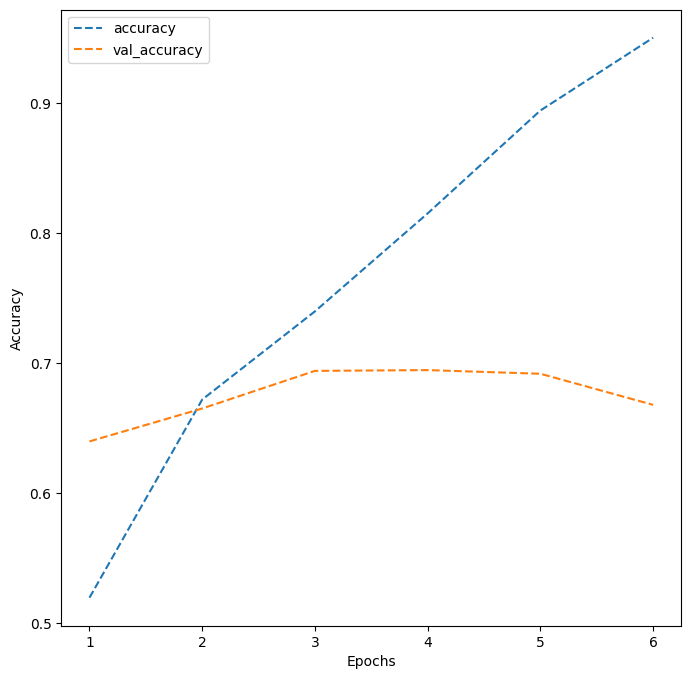

In [26]:
# Plotting the accuracies

dict_hist = history_model_1a.history

list_ep = [i for i in range(1, 7)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the Model on the Test Set**

In [27]:
test_images, test_labels = next(test_set1)
accuracy = model_1a.evaluate(test_images, test_labels)


4/4 [==============================] - 0s 10ms/step - loss: 0.7418 - accuracy: 0.7031


4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.57      0.81      0.67        32
           2       0.55      0.34      0.42        32
           3       0.93      0.84      0.89        32

    accuracy                           0.70       128
   macro avg       0.71      0.70      0.69       128
weighted avg       0.71      0.70      0.69       128



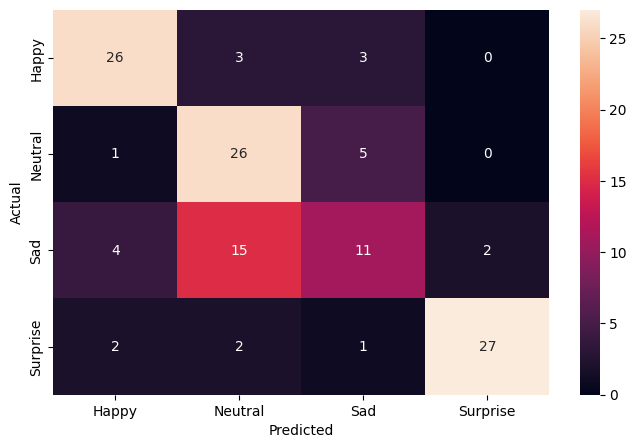

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_1a.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



**Observations and Insights:**
For the first CNN mode,  grayscale color mode is used. Grayscale color mode uses only 1 channel. We used batch size of 32, leaky relu activation function for the first CNN model. After 7 epochs, the training accuracy is 95.05% and the validation accuracy is 66.81%. The model is overfitting. The test accuracy of this model is 70% with avg F1 score of 0.69. However, the model has poor performance for detecting class-1 (neutral) and class-2 (sad) with F-1 score of 0.67 and 0.42, respectively.

# **2(a2)Creating the Base CNN Model (Using rgb):**

In [29]:
# Define the model

def cnn_model_1b():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same', input_shape = (48, 48, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation = LeakyReLU(alpha=0.1)))
    model.add(Dense(4, activation = 'softmax'))

    
    
    # Compile the model

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [30]:
model_1b = cnn_model_1b()

# Print the model summary

model_1b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                  

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [32]:
# Fit the model

history_model_1b = model_1b.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.1830 - accuracy: 0.4567

473/473 [==============================] - 15s 27ms/step - loss: 1.1830 - accuracy: 0.4567 - val_loss: 0.9202 - val_accuracy: 0.6201 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 0.8736 - accuracy: 0.6266

473/473 [==============================] - 13s 27ms/step - loss: 0.8737 - accuracy: 0.6266 - val_loss: 0.8647 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.7160 - accuracy: 0.7064

473/473 [==============================] - 12s 26ms/step - loss: 0.7155 - accuracy: 0.7065 - val_loss: 0.7588 - val_accuracy: 0.6932 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.5664 - accuracy: 0.7730

473/473 [==============================] - 14s 30ms/step - loss: 0.5664 - accuracy: 0.7730 - val_loss: 0.7774 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 0.3921 - accuracy: 0.8459

473/473 [==============================] - 14s 30ms/step - loss: 0.3921 - accuracy: 0.8459 - val_loss: 0.9391 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9140

473/473 [==============================] - 13s 28ms/step - loss: 0.2230 - accuracy: 0.9140 - val_loss: 1.2011 - val_accuracy: 0.6884 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.1486 - accuracy: 0.9467

473/473 [==============================] - 18s 38ms/step - loss: 0.1487 - accuracy: 0.9467 - val_loss: 1.4335 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 8/20
471/473 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9512Restoring model weights from the end of the best epoch: 3.



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 13s 27ms/step - loss: 0.1355 - accuracy: 0.9512 - val_loss: 1.7022 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 8: early stopping


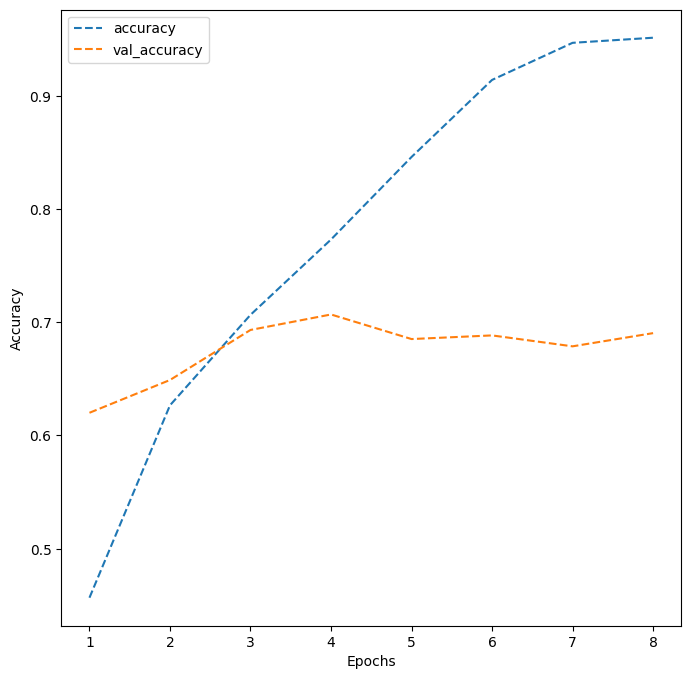

In [34]:
# Plotting the accuracies

dict_hist = history_model_1b.history

list_ep = [i for i in range(1, 9)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.64      0.78      0.70        32
           2       0.81      0.53      0.64        32
           3       0.90      0.84      0.87        32

    accuracy                           0.75       128
   macro avg       0.77      0.75      0.75       128
weighted avg       0.77      0.75      0.75       128



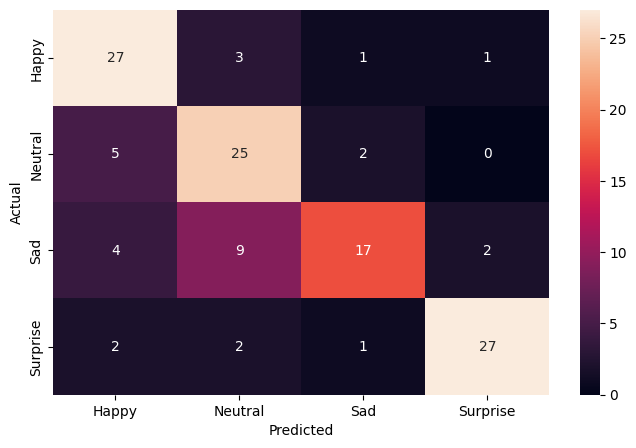

In [35]:
test_images2, test_labels2 = next(test_set2)
accuracy = model_1b.evaluate(test_images2, test_labels2)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_1b.predict(test_images2)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels2, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

For the 2nd CNN mode,  rgb color mode is used. Rgb color mode uses only 3 channels. We used batch size of 32, leaky relu activation function for the first CNN model. After 8 epochs, the training accuracy is 95.12% and the validation accuracy is 69%. The model is overfitting. The test accuracy of this model is 75% with avg F1 score of 0.75. However, the model has poor performance for detecting class-2 (sad) with F-1 score of 0.64.


The model is overfitting. So, for the 2nd CNN, we will try to minimize this. We will apply batch normalization and drop out to the model and will check the model performance again.


## **Think About It:**
Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

**Observation**

 **Comparision between grayscale vs rgb color mode:**
From model summay (model 1a) using grayscale color mode, we can see that the total trainable parameters are 9,826,308 and total iteration time is 90s after early stopping at epoch 7. For rgb model(model 1b), we can see that the total trainable parameters are 9,826,884 with total iteration time is 113.8s.

So, rgb color mode uses 3 channels. So, it generates more parameters and takes more time to train the model compared to the 'grayscale' version. Moreover, even though training accuracy is slightly better for the rgb mode, however, validation, test accuracies and F1 score are slightly better for the 'grayscale' compared to 'rgb'.

Therefore, for further analysis, we will use 'grayscale' color mode option.

In [36]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

### **2(b)Creating the second Convolutional Neural Network**

In [37]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [38]:
# Define the model

def cnn_model_2():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same', input_shape = (48, 48, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = LeakyReLU(alpha=0.1), padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(256, activation = LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    # Compile the model

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [39]:
model_2 = cnn_model_2()

# Print the summary

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

### **Compiling and Training the Model**

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [41]:
# Fit the model

history_model_2 = model_2.fit(train_set1, validation_data = validation_set1,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.5341 - accuracy: 0.4078

473/473 [==============================] - 19s 35ms/step - loss: 1.5341 - accuracy: 0.4078 - val_loss: 1.2529 - val_accuracy: 0.5112 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 1.1024 - accuracy: 0.5250

473/473 [==============================] - 19s 41ms/step - loss: 1.1027 - accuracy: 0.5252 - val_loss: 0.9716 - val_accuracy: 0.5849 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9808 - accuracy: 0.5859

473/473 [==============================] - 15s 31ms/step - loss: 0.9808 - accuracy: 0.5859 - val_loss: 0.9183 - val_accuracy: 0.6367 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.8805 - accuracy: 0.6306

473/473 [==============================] - 13s 27ms/step - loss: 0.8805 - accuracy: 0.6306 - val_loss: 0.8161 - val_accuracy: 0.6681 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 0.8083 - accuracy: 0.6639

473/473 [==============================] - 15s 32ms/step - loss: 0.8083 - accuracy: 0.6639 - val_loss: 1.1124 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 6/20
471/473 [============================>.] - ETA: 0s - loss: 0.7391 - accuracy: 0.6952

473/473 [==============================] - 13s 28ms/step - loss: 0.7394 - accuracy: 0.6949 - val_loss: 0.7973 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 0.6844 - accuracy: 0.7175

473/473 [==============================] - 13s 27ms/step - loss: 0.6844 - accuracy: 0.7175 - val_loss: 0.7897 - val_accuracy: 0.6856 - lr: 0.0010
Epoch 8/20
471/473 [============================>.] - ETA: 0s - loss: 0.6186 - accuracy: 0.7493

473/473 [==============================] - 14s 29ms/step - loss: 0.6198 - accuracy: 0.7486 - val_loss: 0.7609 - val_accuracy: 0.7034 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.5854 - accuracy: 0.7619

473/473 [==============================] - 13s 27ms/step - loss: 0.5854 - accuracy: 0.7619 - val_loss: 0.8278 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 0.5288 - accuracy: 0.7900

473/473 [==============================] - 13s 27ms/step - loss: 0.5291 - accuracy: 0.7899 - val_loss: 0.9239 - val_accuracy: 0.6783 - lr: 0.0010
Epoch 11/20
472/473 [============================>.] - ETA: 0s - loss: 0.4672 - accuracy: 0.8125

473/473 [==============================] - 13s 27ms/step - loss: 0.4671 - accuracy: 0.8124 - val_loss: 1.2669 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 12/20
472/473 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8314

473/473 [==============================] - 13s 27ms/step - loss: 0.4330 - accuracy: 0.8316 - val_loss: 0.8412 - val_accuracy: 0.7103 - lr: 0.0010
Epoch 13/20
471/473 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8456Restoring model weights from the end of the best epoch: 8.



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 15s 31ms/step - loss: 0.4000 - accuracy: 0.8458 - val_loss: 1.3178 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 13: early stopping


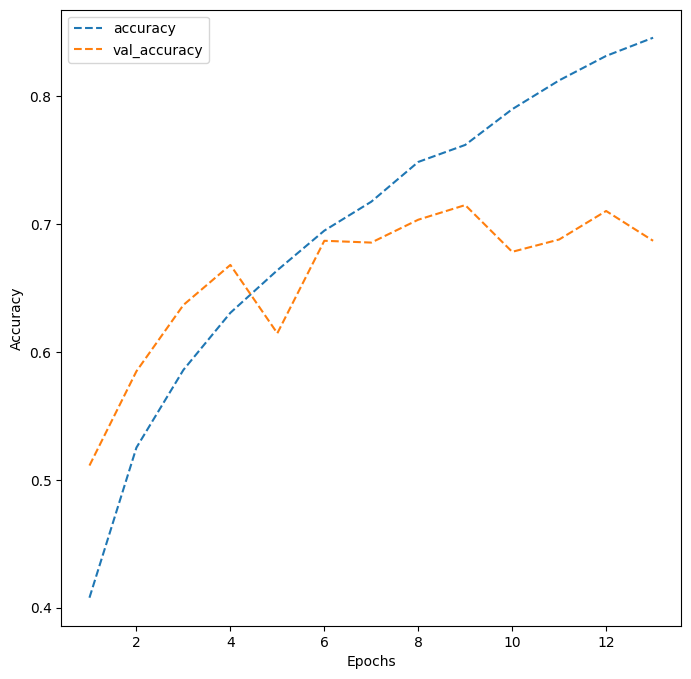

In [42]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 14)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.61      0.59      0.60        32
           2       0.55      0.72      0.62        32
           3       0.89      0.78      0.83        32

    accuracy                           0.70       128
   macro avg       0.73      0.70      0.71       128
weighted avg       0.73      0.70      0.71       128



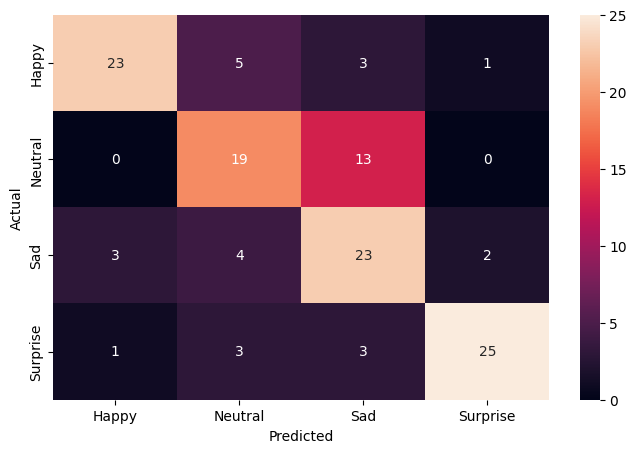

In [43]:
#test_images, test_labels = next(test_set)
accuracy = model_2.evaluate(test_images, test_labels)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_2.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

For the 2nd model, we applied batch normalization and drop out to reduce the overfitting. After early stop at epoch 13, Our 2nd CNN base model has training accuracy of 84.58% and the validation accuracy of 68.70%. However, training accuracy degrades but validation accuracy improves than the 1st CNN model(training accuracy = 95.05% and the validation accuracy = 66.81%). The model is still overfitting.In these 2 CNN models, we used leaky relu as an activation function. 

For the test results, the test accuracy of this model is 70% with avg F1 score of 0.71. However, the model has poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.60 and 0.62, respectively.

 Comparing model 2(a1) and 2(b), overfitting is slightly reduced and F1 score for 'sad' emotion is slightly improved for the model 2(b). However, overall test accuracies, average F1 score and F-1 score for 'neutral' emotions are reduced for the model 2(b) 

In the next two models, we will explore the 'relu' activation function for the both CNN models.




In [44]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

### **2(c)Creating the third Convolutional Neural Network**

In [45]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [46]:
# Define the model

def cnn_model_3():

    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    
    
    # Compile the model

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [47]:
model_3 = cnn_model_3()

# Print the summary

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                    

## **Compiling and Training the Model**

In [48]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_3.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [49]:
# Fit the model

history_model_3 = model_3.fit(train_set1, validation_data = validation_set1,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.1889 - accuracy: 0.4508

473/473 [==============================] - 14s 25ms/step - loss: 1.1889 - accuracy: 0.4508 - val_loss: 1.0221 - val_accuracy: 0.5630 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 0.9438 - accuracy: 0.5923

473/473 [==============================] - 12s 24ms/step - loss: 0.9438 - accuracy: 0.5925 - val_loss: 0.8955 - val_accuracy: 0.6239 - lr: 0.0010
Epoch 3/20
471/473 [============================>.] - ETA: 0s - loss: 0.8028 - accuracy: 0.6652

473/473 [==============================] - 12s 26ms/step - loss: 0.8035 - accuracy: 0.6648 - val_loss: 0.8633 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.7179

473/473 [==============================] - 13s 27ms/step - loss: 0.6824 - accuracy: 0.7179 - val_loss: 0.8098 - val_accuracy: 0.6916 - lr: 0.0010
Epoch 5/20
471/473 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7852

473/473 [==============================] - 13s 28ms/step - loss: 0.5390 - accuracy: 0.7852 - val_loss: 0.8766 - val_accuracy: 0.6781 - lr: 0.0010
Epoch 6/20
472/473 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8560

473/473 [==============================] - 19s 39ms/step - loss: 0.3727 - accuracy: 0.8559 - val_loss: 0.9510 - val_accuracy: 0.6771 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.2134 - accuracy: 0.9209

473/473 [==============================] - 12s 26ms/step - loss: 0.2134 - accuracy: 0.9210 - val_loss: 1.1910 - val_accuracy: 0.6604 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.9561

473/473 [==============================] - 12s 25ms/step - loss: 0.1248 - accuracy: 0.9561 - val_loss: 1.5018 - val_accuracy: 0.6580 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9743Restoring model weights from the end of the best epoch: 4.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 13s 28ms/step - loss: 0.0756 - accuracy: 0.9743 - val_loss: 1.8980 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 9: early stopping


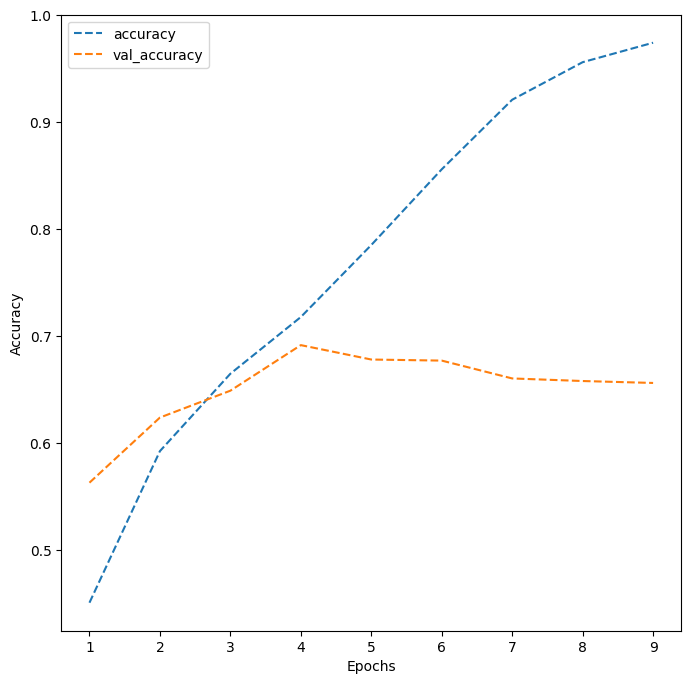

In [50]:
# Plotting the accuracies

dict_hist = history_model_3.history

list_ep = [i for i in range(1, 10)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        32
           1       0.68      0.66      0.67        32
           2       0.57      0.41      0.47        32
           3       0.77      0.84      0.81        32

    accuracy                           0.67       128
   macro avg       0.66      0.67      0.66       128
weighted avg       0.66      0.67      0.66       128



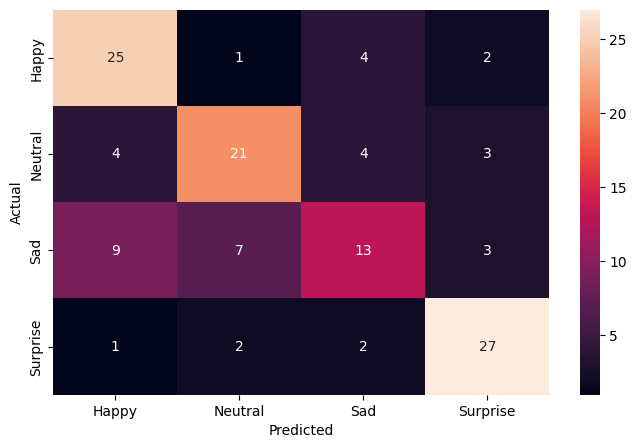

In [51]:
#test_images, test_labels = next(test_set)
accuracy = model_3.evaluate(test_images, test_labels)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

For the 3rd model, we applied relu activation function and reused the first CNN model. Our 3rd CNN base model has training accuracy of 97.43% (slightly better than the 1st CNN model1, 95.05%) and the validation accuracy of 65.62% (slightly lower than the 1st CNN model, validation accuracy of 66.81%).The model is still overfitting. 

For the test results, the test accuracy of this model is 67% with avg F1 score of 0.66. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.67 and 0.47, respectively. the test results show slightly lower performance for the relu activation function (model 2c) than the leaky relu activation function (model 2a1).

In [52]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

## **2(d)Creating the fourth Convolutional Neural Network**

In [53]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [54]:
# Define the model

def cnn_model_4():
    
    model = Sequential()
    
    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4, activation = 'softmax'))

    # Compile the model

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [55]:
model_4 = cnn_model_4()

# Print the summary

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       2

### **Compiling and Training the Model**

In [56]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_4.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [57]:
# Fit the model

history_model_4 = model_4.fit(train_set1, validation_data = validation_set1,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
471/473 [============================>.] - ETA: 0s - loss: 1.4254 - accuracy: 0.3984

473/473 [==============================] - 16s 29ms/step - loss: 1.4241 - accuracy: 0.3990 - val_loss: 1.3310 - val_accuracy: 0.2988 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 0.9868 - accuracy: 0.5678

473/473 [==============================] - 12s 24ms/step - loss: 0.9871 - accuracy: 0.5677 - val_loss: 1.0136 - val_accuracy: 0.5371 - lr: 0.0010
Epoch 3/20
471/473 [============================>.] - ETA: 0s - loss: 0.8313 - accuracy: 0.6481

473/473 [==============================] - 11s 23ms/step - loss: 0.8324 - accuracy: 0.6473 - val_loss: 0.8971 - val_accuracy: 0.6369 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.6970

473/473 [==============================] - 12s 26ms/step - loss: 0.7297 - accuracy: 0.6970 - val_loss: 0.9071 - val_accuracy: 0.6532 - lr: 0.0010
Epoch 5/20
471/473 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.7350

473/473 [==============================] - 19s 41ms/step - loss: 0.6338 - accuracy: 0.7349 - val_loss: 0.9608 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 6/20
471/473 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7860

473/473 [==============================] - 17s 37ms/step - loss: 0.5352 - accuracy: 0.7856 - val_loss: 0.8131 - val_accuracy: 0.6839 - lr: 0.0010
Epoch 7/20
472/473 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8347

473/473 [==============================] - 12s 25ms/step - loss: 0.4183 - accuracy: 0.8347 - val_loss: 0.8167 - val_accuracy: 0.7034 - lr: 0.0010
Epoch 8/20
472/473 [============================>.] - ETA: 0s - loss: 0.3253 - accuracy: 0.8744

473/473 [==============================] - 12s 24ms/step - loss: 0.3255 - accuracy: 0.8744 - val_loss: 1.2484 - val_accuracy: 0.6624 - lr: 0.0010
Epoch 9/20
472/473 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.9007

473/473 [==============================] - 12s 25ms/step - loss: 0.2520 - accuracy: 0.9008 - val_loss: 1.0347 - val_accuracy: 0.6717 - lr: 0.0010
Epoch 10/20
472/473 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9252

473/473 [==============================] - 12s 25ms/step - loss: 0.2116 - accuracy: 0.9252 - val_loss: 1.1121 - val_accuracy: 0.6763 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.1866 - accuracy: 0.9304Restoring model weights from the end of the best epoch: 6.



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 12s 25ms/step - loss: 0.1866 - accuracy: 0.9304 - val_loss: 1.1599 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 11: early stopping


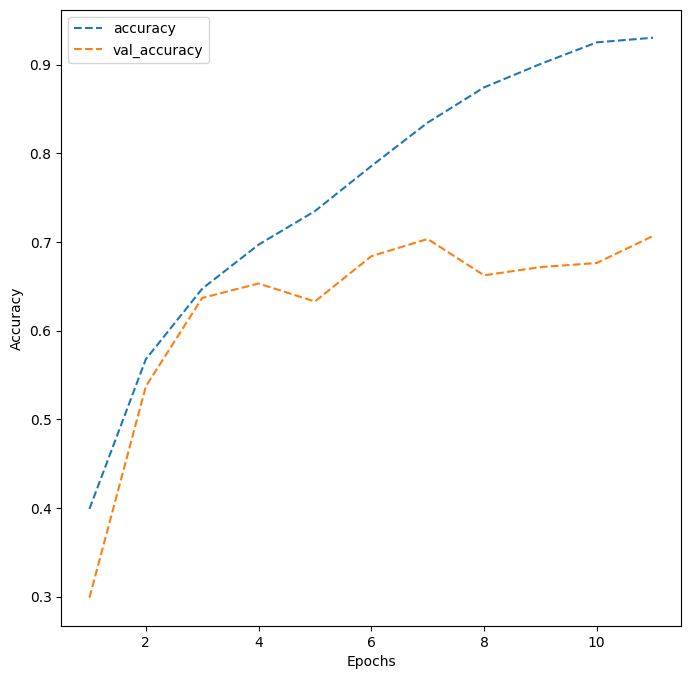

In [58]:
# Plotting the accuracies

dict_hist = history_model_4.history

list_ep = [i for i in range(1, 12)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.58      0.69      0.63        32
           2       0.57      0.62      0.60        32
           3       0.93      0.78      0.85        32

    accuracy                           0.70       128
   macro avg       0.72      0.70      0.71       128
weighted avg       0.72      0.70      0.71       128



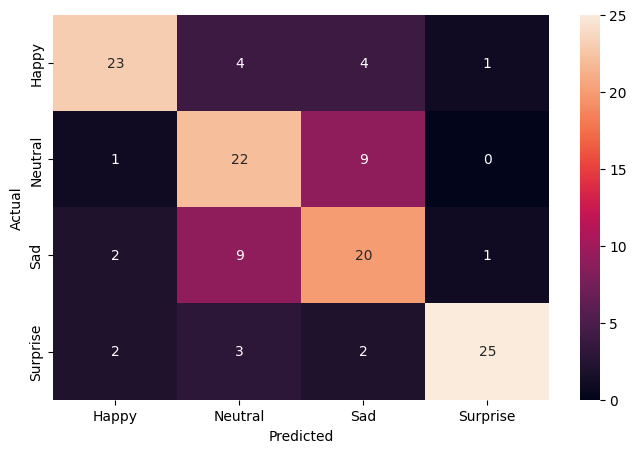

In [59]:
#test_images, test_labels = next(test_set)
accuracy = model_4.evaluate(test_images, test_labels)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model_4.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

For the 4th model, we applied relu activation function and reused the 2nd CNN model. Our 4th CNN base model has training accuracy of 92.45% (slightly better than the CNN model2, 84.58%) and the validation accuracy of 68.68% (slightly lower than the 2nd CNN model, validation accuracy of 68.70%). However, the model is still overfitting.

For the test results, the test accuracy of this model is 70% with avg F1 score of 0.71. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.63 and 0.60, respectively. the test results show slightly better performance for the relu activation function (model 2d) than the leaky relu activation function (model 2b).

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?


**Overall impression:**

I have used four different combination of CNN architectures for the training purposes of the face emotion detection. However, none of the model performance shows the satisfactory validation and test accuracy results. All four models are overfitting. We will need more deeper neural networks for the face emotion detections. Next, I will apply various transfer learning algorithms and check the model performances.

In [60]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [61]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [62]:
#Creating training, validation and test image data generator using color_mode = 'rgb'

batch_size  = 32
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set2 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set2 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set2 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "rgb",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [63]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

## **3(a)VGG model1:**

In [64]:
#Output from the 5th block of VGG as the input for our new model
transfer_layer = vgg_model.get_layer('block5_pool')
vgg_model.trainable = False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vgg_model1 = Model(vgg_model.input, pred) # Initializing the model



### **Compiling and Training the VGG16 Model**

In [65]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vgg_model1.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [66]:
# Compile the model

vgg_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# Fitting the model
history_VGGmodel_1 =vgg_model1.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3515 - accuracy: 0.3970
Epoch 1: val_loss improved from -inf to 1.20284, saving model to ./vgg_model1.h5
473/473 [==============================] - 18s 33ms/step - loss: 1.3515 - accuracy: 0.3970 - val_loss: 1.2028 - val_accuracy: 0.4678 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 1.1782 - accuracy: 0.4774
Epoch 2: val_loss did not improve from 1.20284
473/473 [==============================] - 14s 30ms/step - loss: 1.1781 - accuracy: 0.4778 - val_loss: 1.1083 - val_accuracy: 0.5128 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.1368 - accuracy: 0.5026
Epoch 3: val_loss did not improve from 1.20284
473/473 [==============================] - 13s 27ms/step - loss: 1.1362 - accuracy: 0.5030 - val_loss: 1.0787 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1067 - accuracy: 0.5173
Epo

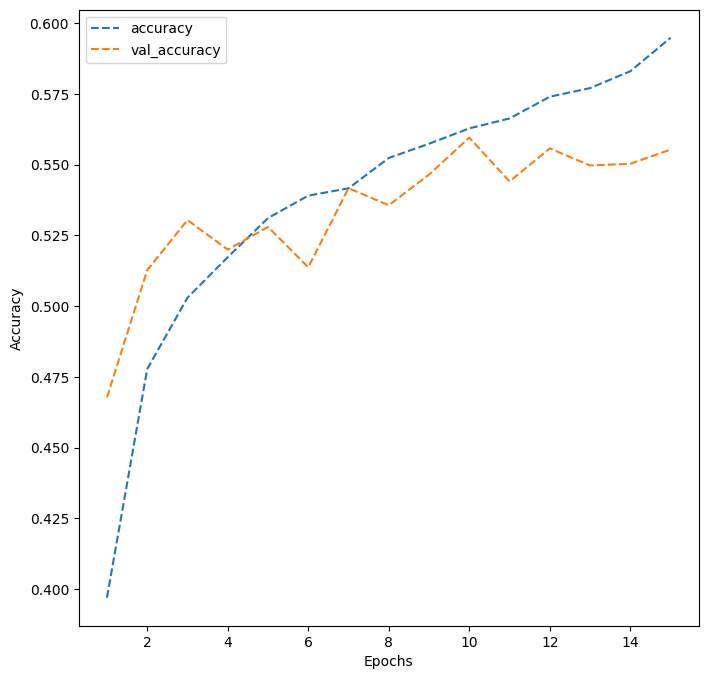

In [68]:
# Plotting the accuracies

dict_hist = history_VGGmodel_1.history

list_ep = [i for i in range(1,16)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [69]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **3(b)VGG model2:**

In [70]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [71]:
#Output from the 4th block of VGG as the input for our new model
transfer_layer = vgg_model.get_layer('block4_pool')
vgg_model.trainable = False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vgg_model2 = Model(vgg_model.input, pred) # Initializing the model


In [72]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vgg_model2.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [73]:
# Compile the model

vgg_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_VGGmodel_2 =vgg_model2.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
471/473 [============================>.] - ETA: 0s - loss: 1.1898 - accuracy: 0.4709
Epoch 1: val_loss improved from -inf to 1.04124, saving model to ./vgg_model2.h5
473/473 [==============================] - 14s 26ms/step - loss: 1.1901 - accuracy: 0.4706 - val_loss: 1.0412 - val_accuracy: 0.5732 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 0.9239 - accuracy: 0.6136
Epoch 2: val_loss did not improve from 1.04124
473/473 [==============================] - 13s 28ms/step - loss: 0.9239 - accuracy: 0.6138 - val_loss: 0.8941 - val_accuracy: 0.6351 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.8489 - accuracy: 0.6503
Epoch 3: val_loss did not improve from 1.04124
473/473 [==============================] - 13s 27ms/step - loss: 0.8494 - accuracy: 0.6501 - val_loss: 0.9091 - val_accuracy: 0.6335 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 0.8027 - accuracy: 0.6749
Epo

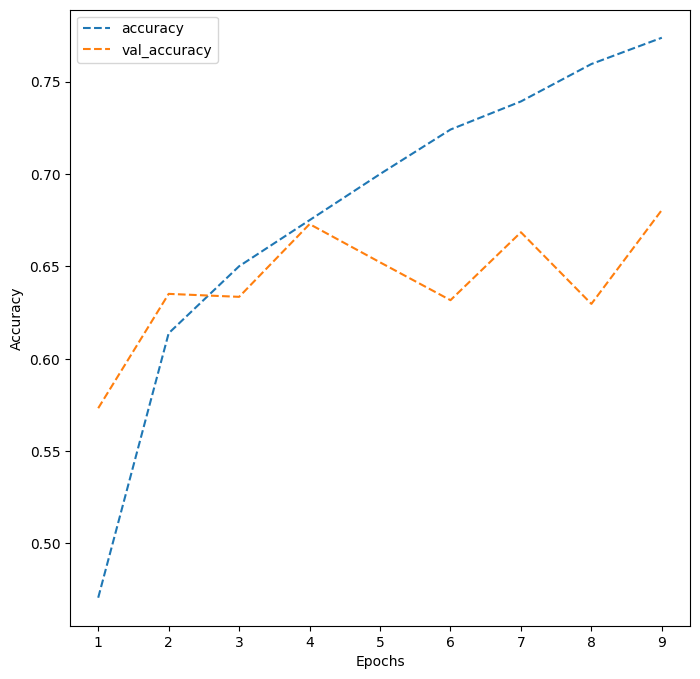

In [74]:
# Plotting the accuracies

dict_hist = history_VGGmodel_2.history

list_ep = [i for i in range(1, 10)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [75]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **3(c)VGG model3:**

In [76]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [77]:
#Output from the 3rd block of VGG as the input for our new model
transfer_layer = vgg_model.get_layer('block3_pool')
vgg_model.trainable = False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vgg_model3 = Model(vgg_model.input, pred) # Initializing the model

In [78]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vgg_model3.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [79]:
# Compile the model

vgg_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_VGGmodel_3 =vgg_model3.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
471/473 [============================>.] - ETA: 0s - loss: 1.1793 - accuracy: 0.4789
Epoch 1: val_loss improved from -inf to 0.83165, saving model to ./vgg_model3.h5
473/473 [==============================] - 14s 25ms/step - loss: 1.1782 - accuracy: 0.4798 - val_loss: 0.8317 - val_accuracy: 0.6693 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 0.8944 - accuracy: 0.6217
Epoch 2: val_loss improved from 0.83165 to 0.83801, saving model to ./vgg_model3.h5
473/473 [==============================] - 13s 28ms/step - loss: 0.8944 - accuracy: 0.6217 - val_loss: 0.8380 - val_accuracy: 0.6343 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.7885 - accuracy: 0.6762
Epoch 3: val_loss improved from 0.83801 to 0.91512, saving model to ./vgg_model3.h5
473/473 [==============================] - 11s 24ms/step - loss: 0.7892 - accuracy: 0.6758 - val_loss: 0.9151 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 4/20
472/473 [=====

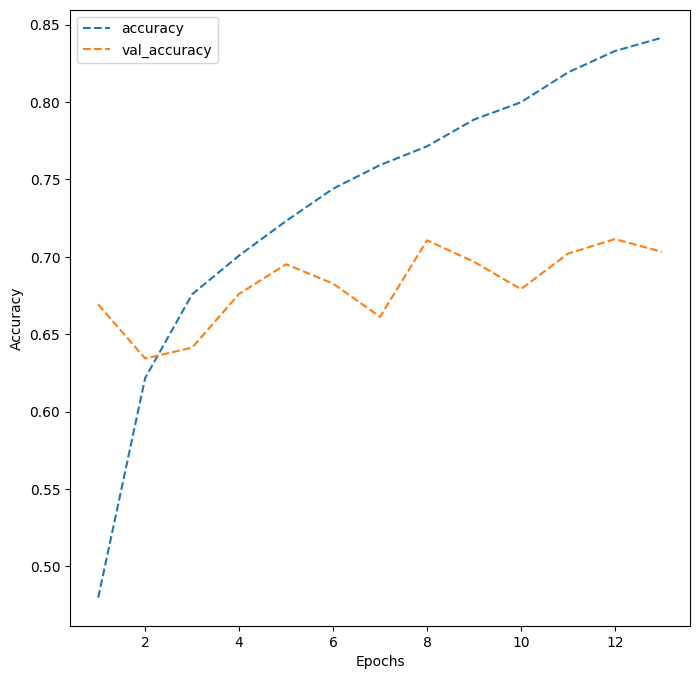

In [80]:
# Plotting the accuracies

dict_hist = history_VGGmodel_3.history

list_ep = [i for i in range(1, 14)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the VGG16 model using VGG16 model3**

4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.55      0.88      0.67        32
           2       0.74      0.44      0.55        32
           3       0.93      0.84      0.89        32

    accuracy                           0.73       128
   macro avg       0.77      0.73      0.73       128
weighted avg       0.77      0.73      0.73       128



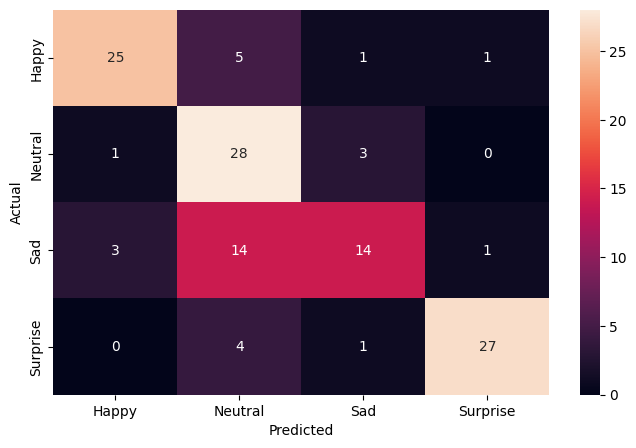

In [81]:
#test_images, test_labels = next(test_set)
accuracy = vgg_model3.evaluate(test_images2, test_labels2)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = vgg_model3.predict(test_images2)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels2, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
For the VGG16 models, I have utilized 3 different CNN architectectures on top of the VGG16 transfer layer to observe the performance evaluations.

* Model 3(a): In this model, I imported VGG16 upto the layer of 'block5_pool' and then added 2 layers on top of it.The model has training accuracy of 59.49% and the validation accuracy of 55.54%.

* Model 3(b): In this model, I imported VGG16 upto the layer of 'block4_pool' and then added 3 layers on top of it.The model has training accuracy of 77.38% and the validation accuracy of 68.05%.

* Model 3(c): In this model, I imported VGG16 upto the layer of 'block3_pool' and then added 3 layers on top of it.The model has training accuracy of 84.16% and the validation accuracy of 70.32%.

For the testing purposes, I selected model 3(c) based on the training and validation accuracies. The overall test accuracy of this model is 73% with avg F1 score of 0.73. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.67 and 0.55, respectively.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

In [82]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **ResNet V2 Model**

In [83]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [84]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet_model = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet_model.summary()

171446536/171446536 [==============================] - 9s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

## **4(a)Resnet model1:**

In [85]:
#Output from the 5th block of VGG as the input for our new model
transfer_layer_Resnet = Resnet_model.get_layer('conv5_block3_add')
Resnet_model.trainable=False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_Resnet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

resnet_model1 = Model(Resnet_model.input, pred) 


### **Compiling and Training the Model**

In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./resnet_model1.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [87]:
# Compile the model

resnet_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_ResnetModel_1 =resnet_model1.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4860 - accuracy: 0.2590
Epoch 1: val_loss improved from -inf to 1.38526, saving model to ./resnet_model1.h5
473/473 [==============================] - 35s 58ms/step - loss: 1.4860 - accuracy: 0.2590 - val_loss: 1.3853 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4098 - accuracy: 0.2615
Epoch 2: val_loss improved from 1.38526 to 1.41062, saving model to ./resnet_model1.h5
473/473 [==============================] - 24s 51ms/step - loss: 1.4099 - accuracy: 0.2613 - val_loss: 1.4106 - val_accuracy: 0.1601 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4037 - accuracy: 0.2577
Epoch 3: val_loss did not improve from 1.41062
473/473 [==============================] - 28s 60ms/step - loss: 1.4037 - accuracy: 0.2577 - val_loss: 1.3463 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ET

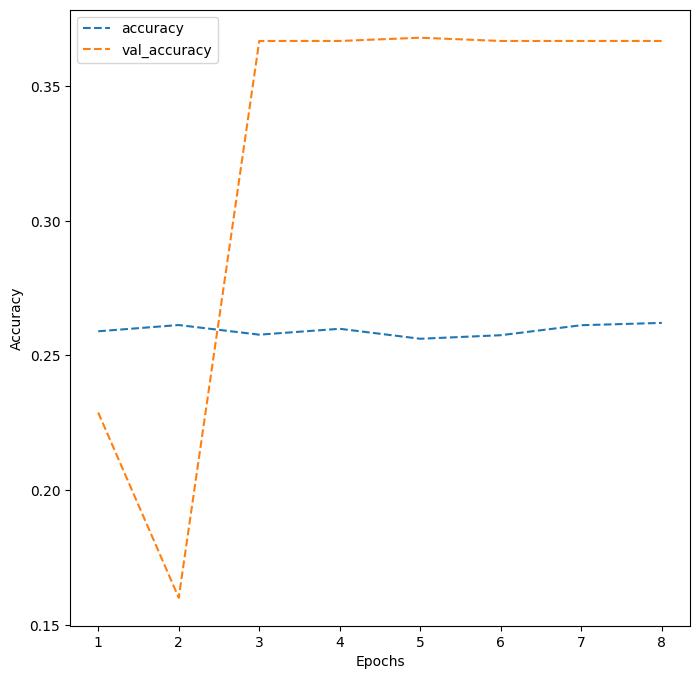

In [88]:
# Plotting the accuracies

dict_hist = history_ResnetModel_1.history

list_ep = [i for i in range(1, 9)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [89]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **4(b)Resnet model2:**

In [90]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [91]:
#Output from the Convolution4 block 23 of Resnet as the input for our new model
transfer_layer_Resnet = Resnet_model.get_layer('conv4_block23_add')
Resnet_model.trainable=False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_Resnet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

resnet_model2 = Model(Resnet_model.input, pred) 

In [92]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./resnet_model2.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [93]:
# Compile the model

resnet_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_ResnetModel_2 =resnet_model2.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4803 - accuracy: 0.2584
Epoch 1: val_loss improved from -inf to 1.38770, saving model to ./resnet_model2.h5
473/473 [==============================] - 36s 58ms/step - loss: 1.4803 - accuracy: 0.2584 - val_loss: 1.3877 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4043 - accuracy: 0.2560
Epoch 2: val_loss did not improve from 1.38770
473/473 [==============================] - 21s 43ms/step - loss: 1.4043 - accuracy: 0.2559 - val_loss: 1.3606 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.3979 - accuracy: 0.2639
Epoch 3: val_loss did not improve from 1.38770
473/473 [==============================] - 23s 48ms/step - loss: 1.3979 - accuracy: 0.2639 - val_loss: 1.3637 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.3959 - accuracy: 0.2596


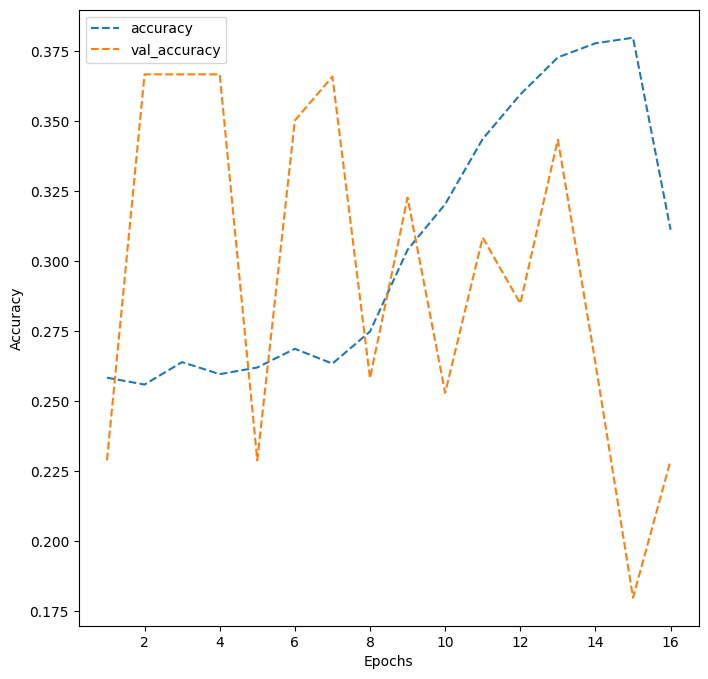

In [94]:
# Plotting the accuracies

dict_hist = history_ResnetModel_2.history

list_ep = [i for i in range(1, 17)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [95]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **4(c)Resnet model3:**

In [96]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [97]:
#Output from the Convolution3 block 4 of Resnet as the input for our new model
transfer_layer_Resnet = Resnet_model.get_layer('conv3_block4_add')
Resnet_model.trainable=False


#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_Resnet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

resnet_model3 = Model(Resnet_model.input, pred) 

In [98]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./resnet_model3.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [99]:
# Compile the model

resnet_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_ResnetModel_3 =resnet_model3.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.4800 - accuracy: 0.2529
Epoch 1: val_loss improved from -inf to 1.66177, saving model to ./resnet_model3.h5
473/473 [==============================] - 16s 29ms/step - loss: 1.4798 - accuracy: 0.2529 - val_loss: 1.6618 - val_accuracy: 0.1601 - lr: 0.0010
Epoch 2/20
471/473 [============================>.] - ETA: 0s - loss: 1.4089 - accuracy: 0.2610
Epoch 2: val_loss did not improve from 1.66177
473/473 [==============================] - 15s 32ms/step - loss: 1.4089 - accuracy: 0.2610 - val_loss: 1.3819 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3991 - accuracy: 0.2647
Epoch 3: val_loss did not improve from 1.66177
473/473 [==============================] - 12s 26ms/step - loss: 1.3991 - accuracy: 0.2644 - val_loss: 1.3577 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
471/473 [============================>.] - ETA: 0s - loss: 1.3977 - accuracy: 0.2590


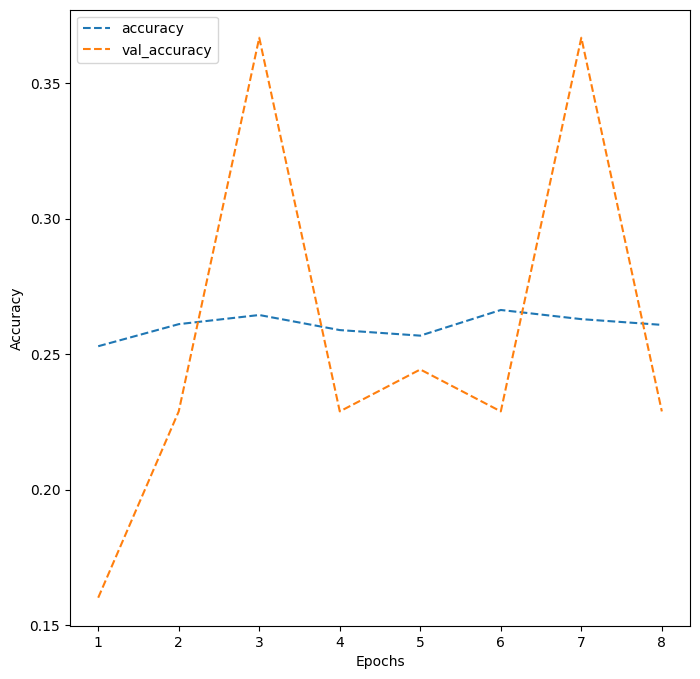

In [100]:
# Plotting the accuracies

dict_hist = history_ResnetModel_3.history

list_ep = [i for i in range(1, 9)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the ResNet Model**

4/4 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


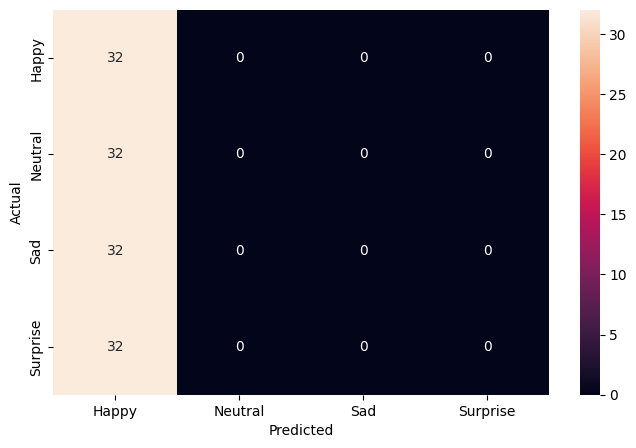

In [101]:
#test_images, test_labels = next(test_set)
accuracy = resnet_model3.evaluate(test_images2, test_labels2)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = resnet_model3.predict(test_images2)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels2, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [102]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

**Observations and Insights:**
For the Resnet v2 models, I have utilized 3 different CNN architectectures on top of the Resnet transfer layer to observe the performance evaluations.

* Model 4(a): In this model, I imported Resnet upto the layer of 'conv5_block3_add' and then added 2 layers on top of it.The model has training accuracy of 26.21% and the validation accuracy of 36.67%.

* Model 4(b): In this model, I imported Resnet upto the layer of 'conv4_block23_add' and then added 3 layers on top of it.The model has training accuracy of 31.12% and the validation accuracy of 22.89%.

* Model 4(c): In this model, I imported Resnet upto the layer of 'conv3_block4_add' and then added 3 layers on top of it.The model has training accuracy of 26.08% and the validation accuracy of 22.89%.

For the testing purposes, I selected model 4(c) based on the training and validation accuracies. The overall test accuracy of this model is 25% with avg F1 score of 0.10. 

Overall, Resnet models show very poor performance for the facial emotion detection.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [103]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [104]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 2s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

## **5(a)EfficientNet model1:**

In [105]:
#Output from the block 6e of efficientNet as the input for our new model
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_EfficientNet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

EfficientNet_model1 = Model(EfficientNet.input, pred) 

### **Compiling and Training the Model**

In [106]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./EfficientNet_model1.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [107]:
# Compile the model

EfficientNet_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_EfficientNet_Model_1 =EfficientNet_model1.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4814 - accuracy: 0.2538
Epoch 1: val_loss improved from -inf to 1.34797, saving model to ./EfficientNet_model1.h5
473/473 [==============================] - 30s 42ms/step - loss: 1.4814 - accuracy: 0.2538 - val_loss: 1.3480 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4143 - accuracy: 0.2575
Epoch 2: val_loss improved from 1.34797 to 1.35559, saving model to ./EfficientNet_model1.h5
473/473 [==============================] - 15s 33ms/step - loss: 1.4144 - accuracy: 0.2573 - val_loss: 1.3556 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3994 - accuracy: 0.2597
Epoch 3: val_loss improved from 1.35559 to 1.37237, saving model to ./EfficientNet_model1.h5
473/473 [==============================] - 15s 32ms/step - loss: 1.3994 - accuracy: 0.2593 - val_loss: 1.3724 - val_accuracy: 0.2443 - lr: 0.001

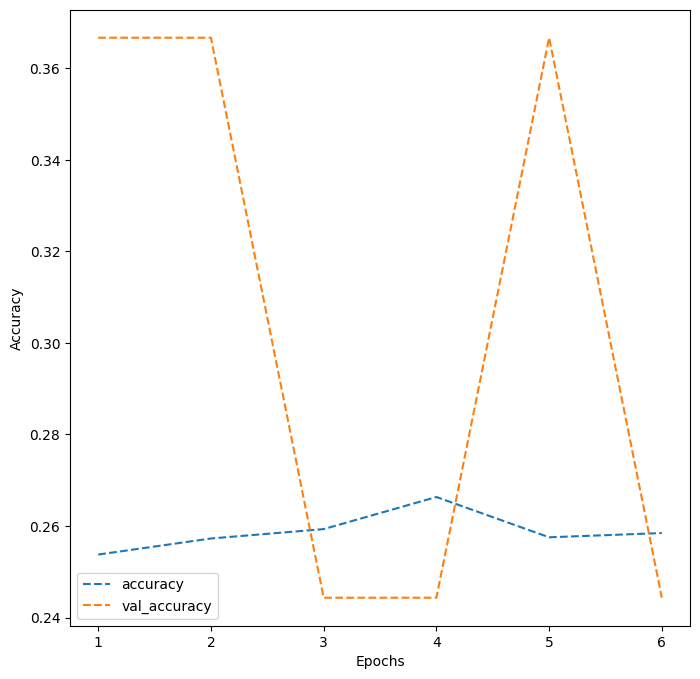

In [108]:
# Plotting the accuracies

dict_hist = history_EfficientNet_Model_1.history

list_ep = [i for i in range(1, 7)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [109]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **5(b)EfficientNet model2:**

In [110]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [111]:
#Output from the block 5e expand activation of efficientNet as the input for our new model
transfer_layer_EfficientNet = EfficientNet.get_layer('block5e_expand_activation')
EfficientNet.trainable = False

#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_EfficientNet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

EfficientNet_model2 = Model(EfficientNet.input, pred) 

In [112]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./EfficientNet_model2.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [113]:
# Compile the model

EfficientNet_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_EfficientNet_Model_2 =EfficientNet_model2.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.4726 - accuracy: 0.2558
Epoch 1: val_loss improved from -inf to 1.38512, saving model to ./EfficientNet_model2.h5
473/473 [==============================] - 20s 31ms/step - loss: 1.4726 - accuracy: 0.2556 - val_loss: 1.3851 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4076 - accuracy: 0.2536
Epoch 2: val_loss did not improve from 1.38512
473/473 [==============================] - 14s 29ms/step - loss: 1.4075 - accuracy: 0.2536 - val_loss: 1.3531 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 3/20
471/473 [============================>.] - ETA: 0s - loss: 1.4059 - accuracy: 0.2552
Epoch 3: val_loss improved from 1.38512 to 1.38715, saving model to ./EfficientNet_model2.h5
473/473 [==============================] - 15s 32ms/step - loss: 1.4057 - accuracy: 0.2551 - val_loss: 1.3872 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 4/20
472/473 [========================

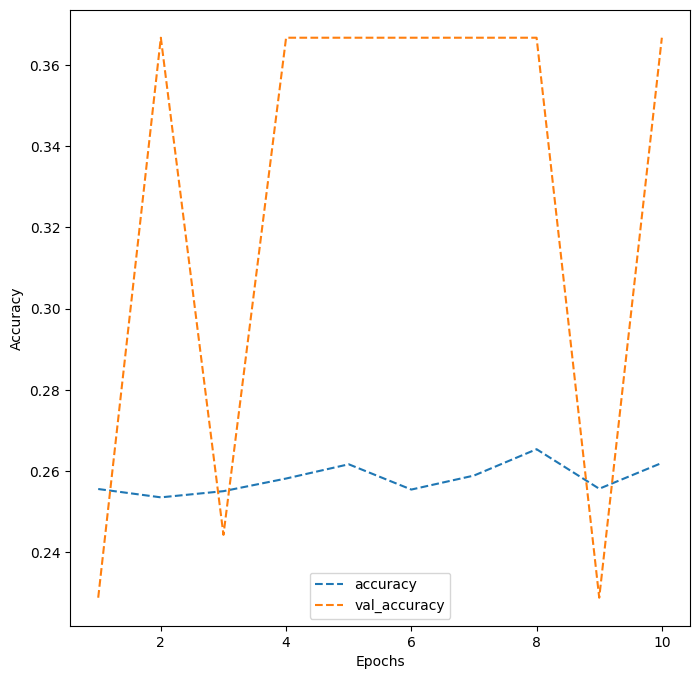

In [114]:
# Plotting the accuracies

dict_hist = history_EfficientNet_Model_2.history

list_ep = [i for i in range(1, 11)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [115]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **5(c)EfficientNet model3:**

In [116]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [117]:
#Output from the block 4d expand activation of efficientNet as the input for our new model
transfer_layer_EfficientNet = EfficientNet.get_layer('block4d_expand_activation')
EfficientNet.trainable = False

#flattening and addition of classification layer on top of it

x = Flatten()(transfer_layer_EfficientNet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation='softmax')(x)

EfficientNet_model3 = Model(EfficientNet.input, pred) 

In [118]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./EfficientNet_model3.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [119]:
# Compile the model

EfficientNet_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history_EfficientNet_Model_3 =EfficientNet_model3.fit(train_set2, validation_data = validation_set2,          
          epochs=20,callbacks = callbacks_list)

Epoch 1/20
471/473 [============================>.] - ETA: 0s - loss: 1.4764 - accuracy: 0.2522
Epoch 1: val_loss improved from -inf to 1.43268, saving model to ./EfficientNet_model3.h5
473/473 [==============================] - 22s 38ms/step - loss: 1.4760 - accuracy: 0.2521 - val_loss: 1.4327 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.4060 - accuracy: 0.2604
Epoch 2: val_loss did not improve from 1.43268
473/473 [==============================] - 14s 29ms/step - loss: 1.4061 - accuracy: 0.2603 - val_loss: 1.4015 - val_accuracy: 0.2443 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.4023 - accuracy: 0.2518
Epoch 3: val_loss did not improve from 1.43268
473/473 [==============================] - 14s 30ms/step - loss: 1.4023 - accuracy: 0.2518 - val_loss: 1.3729 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.3953 - accuracy: 0

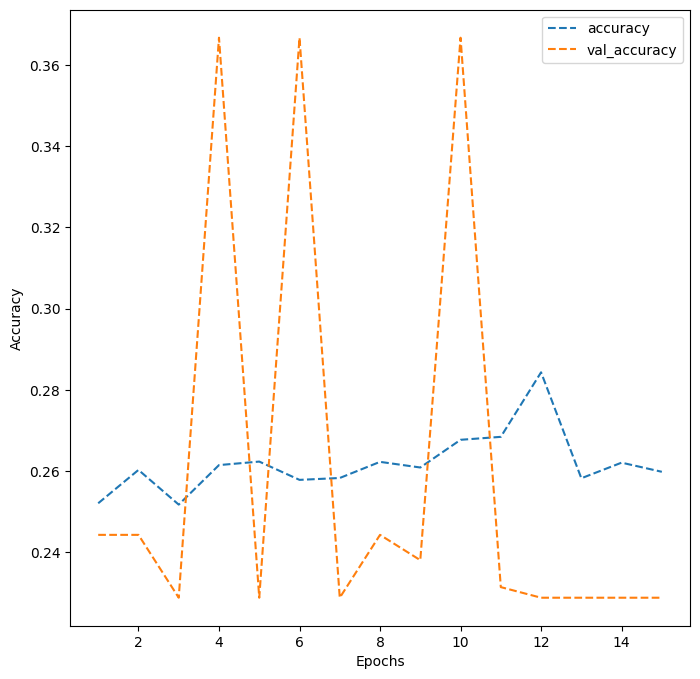

In [120]:
# Plotting the accuracies

dict_hist = history_EfficientNet_Model_3.history

list_ep = [i for i in range(1, 16)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the EfficientnetNet Model**

4/4 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


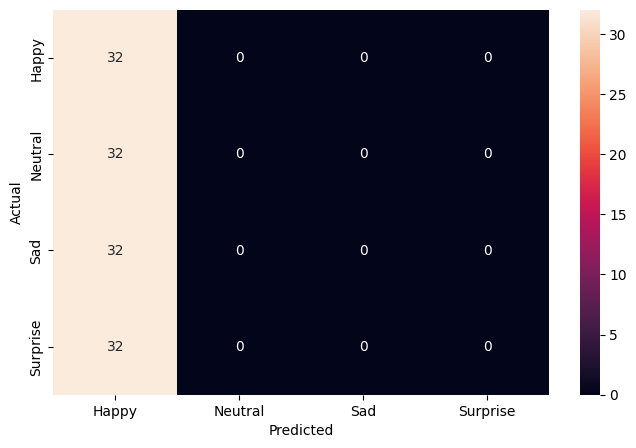

In [121]:
#test_images, test_labels = next(test_set)
accuracy = EfficientNet_model2.evaluate(test_images2, test_labels2)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = EfficientNet_model2.predict(test_images2)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels2, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
For the EfficientNet models, I have utilized 3 different CNN architectectures on top of the EfficientNet transfer layer to observe the performance evaluations.

* Model 5(a): In this model, I imported EfficientNet upto the layer of 'block6e_expand_activation' and then added 2 layers on top of it.The model has training accuracy of 25.85% and the validation accuracy of 24.43%.

* Model 5(b): In this model, I imported EfficientNet upto the layer of 'block5e_expand_activation' and then added 3 layers on top of it.The model has training accuracy of 26.20% and the validation accuracy of 36.67%.

* Model 5(c): In this model, I imported EfficientNet upto the layer of 'block4d_expand_activation' and then added 3 layers on top of it.The model has training accuracy of 25.98% and the validation accuracy of 22.89%.

For the testing purposes, I selected model 5(b) based on the training and validation accuracies. The overall test accuracy of this model is 25% with avg F1 score of 0.10. 

Overall, EfficientNet models show very poor performance like Resnet v2 for the facial emotion detection.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

**Observation:**

All these transfer learning models are pretrained with RGB images and each filter in these models require 3 channel imputs.These filters try to detect features in channels. However, all the images in our facial emotion recognition dataset are grayscale images with a single channel. As a result, if we use grayscale images for these transfer learning, thay will not work well as the filters would not be able to detect features in channels.

Moreover, even if I expanded the single channel grayscale image to 3 channels, it did not provide any additional information in this case. Therefore, training, validation and test accuracies show very poor performances for the face emotion dataset.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

In [122]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

In [123]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

## **Hyperparameter model tuning using keras-tuner**

In [124]:
## Install Keras Tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 15.5 MB/s eta 0:00:00


In [125]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


<ipython-input-125-9c5514573a24>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [126]:
#Creating training, validation and test image data generator using color_mode = 'grayscale'

batch_size  = 32
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set1 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set1 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set1 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)



Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [127]:
def build_model(h):
    model = keras.Sequential()
    
    # Convolution 
    model.add(tf.keras.layers.Conv2D(filters=h.Int('conv_1_filter', min_value=32, max_value=256, step=32),
                kernel_size=h.Choice('conv_1_kernel', values = [2,5]),
                activation='relu',
                input_shape=(48,48,1)))
    model.add(tf.keras.layers.Conv2D(filters=h.Int('conv_2_filter', min_value=32, max_value=256, step=32),
                kernel_size=h.Choice('conv_1_kernel', values = [2,5]),activation='relu'))
    # pooling
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    # Convolution
    model.add(tf.keras.layers.Conv2D(filters=h.Int('conv_3_filter', min_value=32, max_value=256, step=32),
                                   kernel_size=h.Choice('conv_1_kernel', values = [2,5]),activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=h.Int('conv_4_filter', min_value=32, max_value=256, step=32),
                                   kernel_size=h.Choice('conv_1_kernel', values = [2,5]),activation='relu'))
    #pooling
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=h.Int('conv_5_filter', min_value=32, max_value=256, step=32),
                                   kernel_size=h.Choice('conv_1_kernel', values = [2,5]),activation='relu'))
    
    #pooling
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))

     #flaterning
    model.add(tf.keras.layers.Flatten())
    keras.layers.Dense(units=h.Int('dense_1_units', min_value=32, max_value=256, step=32),activation='relu'),
    keras.layers.Dense(units=h.Int('dense_2_units', min_value=32, max_value=256, step=32),activation='relu'),
    keras.layers.Dense(units=h.Int('dense_3_units', min_value=32, max_value=256, step=32),activation='relu'),
    model.add(layers.Dense(4, activation='softmax'))



    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

### **Compiling and Training the Model**

In [128]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=40,
    executions_per_trial=3,
     project_name='Result_')


tuner.search_space_summary()

Search space summary
Default search space size: 10
conv_1_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv_1_kernel (Choice)
{'default': 2, 'conditions': [], 'values': [2, 5], 'ordered': True}
conv_2_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv_3_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv_4_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
conv_5_filter (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dense_1_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dense_2_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'samp

In [129]:
train_img,train_lables = train_set1.next()
validation_img,validation_lables = validation_set1.next()

In [130]:
### Searching the best model on X and y train
tuner.search(train_img,train_lables,
             epochs=5,
             validation_data=(validation_img,validation_lables))

Trial 40 Complete [00h 00m 12s]
val_accuracy: 0.34375

Best val_accuracy So Far: 0.375
Total elapsed time: 00h 08m 01s


In [131]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Result_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 2
conv_2_filter: 64
conv_3_filter: 64
conv_4_filter: 96
conv_5_filter: 32
dense_1_units: 96
dense_2_units: 32
dense_3_units: 160
learning_rate: 0.01
Score: 0.375

Trial 34 summary
Hyperparameters:
conv_1_filter: 256
conv_1_kernel: 2
conv_2_filter: 160
conv_3_filter: 224
conv_4_filter: 96
conv_5_filter: 224
dense_1_units: 64
dense_2_units: 256
dense_3_units: 192
learning_rate: 0.01
Score: 0.375

Trial 21 summary
Hyperparameters:
conv_1_filter: 224
conv_1_kernel: 5
conv_2_filter: 96
conv_3_filter: 32
conv_4_filter: 256
conv_5_filter: 128
dense_1_units: 32
dense_2_units: 224
dense_3_units: 128
learning_rate: 0.0001
Score: 0.3645833333333333

Trial 28 summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 2
conv_2_filter: 224
conv_3_filter: 224
conv_4_filter: 128
conv_5_filter: 32
dense_1_units: 96
dense_2_units: 

### **Model 6(a):  hyperparameter tuned and batch size =32**

Let's create a model with the above mentioned best configuration given by Keras Tuner.



In [132]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [133]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 96, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(160,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        1

In [135]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [136]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model = model.fit(train_set1, validation_data = validation_set1,epochs=30,callbacks = callbacks_list)


Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 1.3780 - accuracy: 0.3040

473/473 [==============================] - 19s 30ms/step - loss: 1.3780 - accuracy: 0.3040 - val_loss: 1.3012 - val_accuracy: 0.3834 - lr: 0.0010
Epoch 2/30
472/473 [============================>.] - ETA: 0s - loss: 1.2626 - accuracy: 0.3757

473/473 [==============================] - 15s 31ms/step - loss: 1.2628 - accuracy: 0.3755 - val_loss: 1.2102 - val_accuracy: 0.4573 - lr: 0.0010
Epoch 3/30
471/473 [============================>.] - ETA: 0s - loss: 1.1916 - accuracy: 0.4302

473/473 [==============================] - 14s 30ms/step - loss: 1.1920 - accuracy: 0.4301 - val_loss: 1.1339 - val_accuracy: 0.4969 - lr: 0.0010
Epoch 4/30
473/473 [==============================] - ETA: 0s - loss: 1.1100 - accuracy: 0.4943

473/473 [==============================] - 14s 30ms/step - loss: 1.1100 - accuracy: 0.4943 - val_loss: 1.1051 - val_accuracy: 0.5192 - lr: 0.0010
Epoch 5/30
472/473 [============================>.] - ETA: 0s - loss: 1.0369 - accuracy: 0.5498

473/473 [==============================] - 12s 25ms/step - loss: 1.0370 - accuracy: 0.5498 - val_loss: 1.0458 - val_accuracy: 0.5357 - lr: 0.0010
Epoch 6/30
473/473 [==============================] - ETA: 0s - loss: 0.9844 - accuracy: 0.5803

473/473 [==============================] - 15s 32ms/step - loss: 0.9844 - accuracy: 0.5803 - val_loss: 0.9672 - val_accuracy: 0.6203 - lr: 0.0010
Epoch 7/30
473/473 [==============================] - ETA: 0s - loss: 0.9423 - accuracy: 0.5983

473/473 [==============================] - 12s 26ms/step - loss: 0.9423 - accuracy: 0.5983 - val_loss: 0.9276 - val_accuracy: 0.6301 - lr: 0.0010
Epoch 8/30
473/473 [==============================] - ETA: 0s - loss: 0.8958 - accuracy: 0.6216

473/473 [==============================] - 12s 26ms/step - loss: 0.8958 - accuracy: 0.6216 - val_loss: 0.9974 - val_accuracy: 0.5911 - lr: 0.0010
Epoch 9/30
472/473 [============================>.] - ETA: 0s - loss: 0.8801 - accuracy: 0.6300

473/473 [==============================] - 12s 25ms/step - loss: 0.8803 - accuracy: 0.6299 - val_loss: 0.9617 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 10/30
472/473 [============================>.] - ETA: 0s - loss: 0.8481 - accuracy: 0.6505

473/473 [==============================] - 14s 30ms/step - loss: 0.8479 - accuracy: 0.6506 - val_loss: 0.9323 - val_accuracy: 0.6128 - lr: 0.0010
Epoch 11/30
471/473 [============================>.] - ETA: 0s - loss: 0.8321 - accuracy: 0.6606

473/473 [==============================] - 12s 25ms/step - loss: 0.8318 - accuracy: 0.6610 - val_loss: 0.8541 - val_accuracy: 0.6695 - lr: 0.0010
Epoch 12/30
472/473 [============================>.] - ETA: 0s - loss: 0.8096 - accuracy: 0.6682

473/473 [==============================] - 11s 24ms/step - loss: 0.8091 - accuracy: 0.6683 - val_loss: 0.7826 - val_accuracy: 0.6922 - lr: 0.0010
Epoch 13/30
471/473 [============================>.] - ETA: 0s - loss: 0.7882 - accuracy: 0.6752

473/473 [==============================] - 13s 27ms/step - loss: 0.7878 - accuracy: 0.6756 - val_loss: 0.8622 - val_accuracy: 0.6663 - lr: 0.0010
Epoch 14/30
473/473 [==============================] - ETA: 0s - loss: 0.7717 - accuracy: 0.6866

473/473 [==============================] - 12s 26ms/step - loss: 0.7717 - accuracy: 0.6866 - val_loss: 0.7686 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 15/30
472/473 [============================>.] - ETA: 0s - loss: 0.7593 - accuracy: 0.6929

473/473 [==============================] - 12s 26ms/step - loss: 0.7596 - accuracy: 0.6931 - val_loss: 0.7169 - val_accuracy: 0.7127 - lr: 0.0010
Epoch 16/30
472/473 [============================>.] - ETA: 0s - loss: 0.7387 - accuracy: 0.7016

473/473 [==============================] - 12s 26ms/step - loss: 0.7386 - accuracy: 0.7020 - val_loss: 0.9433 - val_accuracy: 0.6166 - lr: 0.0010
Epoch 17/30
472/473 [============================>.] - ETA: 0s - loss: 0.7333 - accuracy: 0.7031

473/473 [==============================] - 11s 24ms/step - loss: 0.7331 - accuracy: 0.7030 - val_loss: 0.7340 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 18/30
473/473 [==============================] - ETA: 0s - loss: 0.7101 - accuracy: 0.7166

473/473 [==============================] - 12s 25ms/step - loss: 0.7101 - accuracy: 0.7166 - val_loss: 0.7366 - val_accuracy: 0.7123 - lr: 0.0010
Epoch 19/30
472/473 [============================>.] - ETA: 0s - loss: 0.7016 - accuracy: 0.7197

473/473 [==============================] - 12s 26ms/step - loss: 0.7015 - accuracy: 0.7198 - val_loss: 0.7646 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 20/30
472/473 [============================>.] - ETA: 0s - loss: 0.6982 - accuracy: 0.7221Restoring model weights from the end of the best epoch: 15.



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 14s 29ms/step - loss: 0.6977 - accuracy: 0.7223 - val_loss: 0.7738 - val_accuracy: 0.6910 - lr: 0.0010
Epoch 20: early stopping


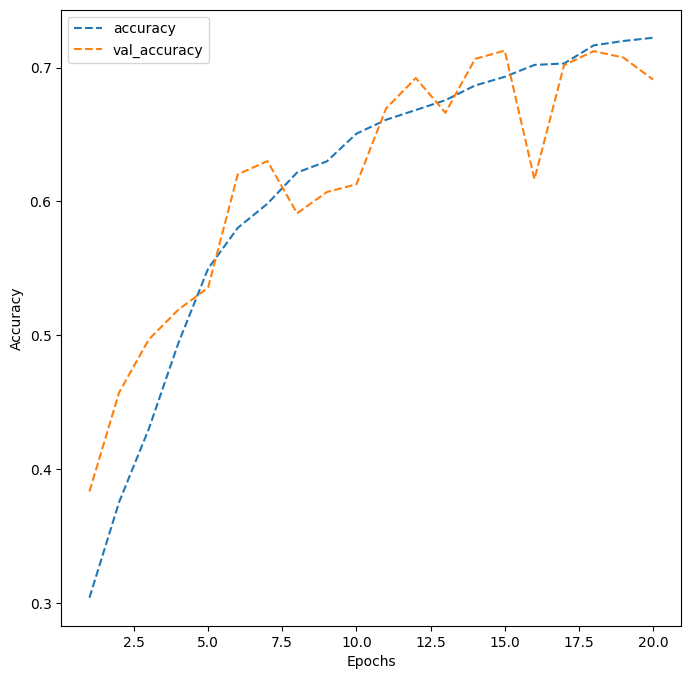

In [137]:
# Plotting the accuracies

dict_hist = history_model.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

### **Evaluating the Model on Test Set**

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.64      0.78      0.70        32
           2       0.64      0.50      0.56        32
           3       0.93      0.84      0.89        32

    accuracy                           0.74       128
   macro avg       0.75      0.74      0.74       128
weighted avg       0.75      0.74      0.74       128



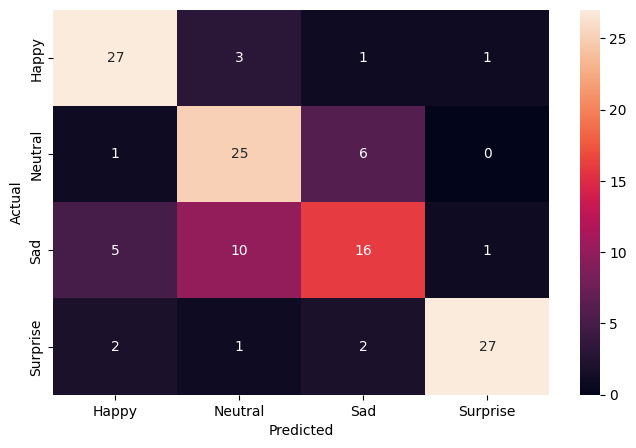

In [138]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#test_images, test_labels = next(test_set1)
accuracy = model.evaluate(test_images, test_labels)
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
For building the complex neural network model, I first used the hyperparameter tuning using random search from the keras tuner to select the building a layer with 5 convolutional blocks for feature selection and 3 dense layers for the classification. As an optimizer, adam with 3 various learning rates: 0.1,0.01 and 0.001 are used.

For model 6a, batch size of 32 is applied. The model has training accuracy of 72.23% and the validation accuracy of 69.10%. The model is not overfitting now. For the test results, the test accuracy of this model is 74% with avg F1 score of 0.74. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.70 and 0.56, respectively. 

In the next two models 6b and 6c, batch size of 64 and 16 are used to observe the model performance for the complex neural network models.

## **Model 6b: Increasing the batch size: batch size = 64**

In [140]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [141]:
#Creating training, validation and test image data generator using color_mode = 'grayscale'

batch_size  = 64
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set3 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set3 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set3 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [142]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 96, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(160,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [143]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        1

In [144]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 30

In [145]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model = model.fit(train_set3, validation_data = validation_set3,epochs=30,callbacks = callbacks_list)

Epoch 1/30
237/237 [==============================] - ETA: 0s - loss: 1.3869 - accuracy: 0.2890

237/237 [==============================] - 17s 55ms/step - loss: 1.3869 - accuracy: 0.2890 - val_loss: 1.3541 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/30
237/237 [==============================] - ETA: 0s - loss: 1.2879 - accuracy: 0.3698

237/237 [==============================] - 9s 39ms/step - loss: 1.2879 - accuracy: 0.3698 - val_loss: 1.2856 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 3/30
236/237 [============================>.] - ETA: 0s - loss: 1.2288 - accuracy: 0.4033

237/237 [==============================] - 10s 42ms/step - loss: 1.2285 - accuracy: 0.4037 - val_loss: 1.1463 - val_accuracy: 0.4917 - lr: 0.0010
Epoch 4/30
237/237 [==============================] - ETA: 0s - loss: 1.1477 - accuracy: 0.4680

237/237 [==============================] - 11s 45ms/step - loss: 1.1477 - accuracy: 0.4680 - val_loss: 1.0742 - val_accuracy: 0.5389 - lr: 0.0010
Epoch 5/30
236/237 [============================>.] - ETA: 0s - loss: 1.0732 - accuracy: 0.5291

237/237 [==============================] - 11s 45ms/step - loss: 1.0736 - accuracy: 0.5289 - val_loss: 1.0334 - val_accuracy: 0.5646 - lr: 0.0010
Epoch 6/30
237/237 [==============================] - ETA: 0s - loss: 1.0066 - accuracy: 0.5646

237/237 [==============================] - 9s 38ms/step - loss: 1.0066 - accuracy: 0.5646 - val_loss: 0.9667 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 7/30
237/237 [==============================] - ETA: 0s - loss: 0.9706 - accuracy: 0.5769

237/237 [==============================] - 11s 44ms/step - loss: 0.9706 - accuracy: 0.5769 - val_loss: 0.9953 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 8/30
237/237 [==============================] - ETA: 0s - loss: 0.9328 - accuracy: 0.6004

237/237 [==============================] - 10s 44ms/step - loss: 0.9328 - accuracy: 0.6004 - val_loss: 0.9754 - val_accuracy: 0.5947 - lr: 0.0010
Epoch 9/30
236/237 [============================>.] - ETA: 0s - loss: 0.8947 - accuracy: 0.6183

237/237 [==============================] - 10s 41ms/step - loss: 0.8943 - accuracy: 0.6184 - val_loss: 0.8582 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 10/30
237/237 [==============================] - ETA: 0s - loss: 0.8815 - accuracy: 0.6324

237/237 [==============================] - 10s 42ms/step - loss: 0.8815 - accuracy: 0.6324 - val_loss: 0.8542 - val_accuracy: 0.6580 - lr: 0.0010
Epoch 11/30
237/237 [==============================] - ETA: 0s - loss: 0.8452 - accuracy: 0.6445

237/237 [==============================] - 11s 48ms/step - loss: 0.8452 - accuracy: 0.6445 - val_loss: 0.9135 - val_accuracy: 0.6249 - lr: 0.0010
Epoch 12/30
237/237 [==============================] - ETA: 0s - loss: 0.8233 - accuracy: 0.6560

237/237 [==============================] - 12s 52ms/step - loss: 0.8233 - accuracy: 0.6560 - val_loss: 0.8867 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 13/30
236/237 [============================>.] - ETA: 0s - loss: 0.8075 - accuracy: 0.6714

237/237 [==============================] - 9s 38ms/step - loss: 0.8069 - accuracy: 0.6717 - val_loss: 0.7782 - val_accuracy: 0.6906 - lr: 0.0010
Epoch 14/30
236/237 [============================>.] - ETA: 0s - loss: 0.7831 - accuracy: 0.6760

237/237 [==============================] - 11s 45ms/step - loss: 0.7833 - accuracy: 0.6758 - val_loss: 0.7642 - val_accuracy: 0.6954 - lr: 0.0010
Epoch 15/30
236/237 [============================>.] - ETA: 0s - loss: 0.7654 - accuracy: 0.6853

237/237 [==============================] - 10s 44ms/step - loss: 0.7655 - accuracy: 0.6852 - val_loss: 0.8195 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 16/30
237/237 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.6876

237/237 [==============================] - 10s 41ms/step - loss: 0.7593 - accuracy: 0.6876 - val_loss: 0.7874 - val_accuracy: 0.6918 - lr: 0.0010
Epoch 17/30
237/237 [==============================] - ETA: 0s - loss: 0.7287 - accuracy: 0.7028

237/237 [==============================] - 9s 39ms/step - loss: 0.7287 - accuracy: 0.7028 - val_loss: 0.7681 - val_accuracy: 0.6916 - lr: 0.0010
Epoch 18/30
236/237 [============================>.] - ETA: 0s - loss: 0.7265 - accuracy: 0.7057

237/237 [==============================] - 10s 44ms/step - loss: 0.7263 - accuracy: 0.7060 - val_loss: 0.7487 - val_accuracy: 0.7026 - lr: 0.0010
Epoch 19/30
236/237 [============================>.] - ETA: 0s - loss: 0.7111 - accuracy: 0.7121

237/237 [==============================] - 10s 44ms/step - loss: 0.7101 - accuracy: 0.7127 - val_loss: 0.7402 - val_accuracy: 0.6972 - lr: 0.0010
Epoch 20/30
236/237 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.7155

237/237 [==============================] - 10s 42ms/step - loss: 0.6931 - accuracy: 0.7159 - val_loss: 0.7640 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 21/30
236/237 [============================>.] - ETA: 0s - loss: 0.6884 - accuracy: 0.7232

237/237 [==============================] - 10s 43ms/step - loss: 0.6880 - accuracy: 0.7232 - val_loss: 0.7404 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 22/30
236/237 [============================>.] - ETA: 0s - loss: 0.6755 - accuracy: 0.7260

237/237 [==============================] - 11s 44ms/step - loss: 0.6752 - accuracy: 0.7260 - val_loss: 0.7690 - val_accuracy: 0.7022 - lr: 0.0010
Epoch 23/30
236/237 [============================>.] - ETA: 0s - loss: 0.6546 - accuracy: 0.7349

237/237 [==============================] - 11s 45ms/step - loss: 0.6551 - accuracy: 0.7348 - val_loss: 0.7038 - val_accuracy: 0.7253 - lr: 0.0010
Epoch 24/30
236/237 [============================>.] - ETA: 0s - loss: 0.6526 - accuracy: 0.7394

237/237 [==============================] - 9s 37ms/step - loss: 0.6532 - accuracy: 0.7392 - val_loss: 0.6935 - val_accuracy: 0.7292 - lr: 0.0010
Epoch 25/30
236/237 [============================>.] - ETA: 0s - loss: 0.6394 - accuracy: 0.7440

237/237 [==============================] - 10s 43ms/step - loss: 0.6390 - accuracy: 0.7441 - val_loss: 0.7236 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 26/30
236/237 [============================>.] - ETA: 0s - loss: 0.6293 - accuracy: 0.7452

237/237 [==============================] - 11s 45ms/step - loss: 0.6295 - accuracy: 0.7453 - val_loss: 0.7377 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 27/30
237/237 [==============================] - ETA: 0s - loss: 0.6176 - accuracy: 0.7541

237/237 [==============================] - 10s 41ms/step - loss: 0.6176 - accuracy: 0.7541 - val_loss: 0.7233 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 28/30
237/237 [==============================] - ETA: 0s - loss: 0.6059 - accuracy: 0.7606

237/237 [==============================] - 10s 41ms/step - loss: 0.6059 - accuracy: 0.7606 - val_loss: 0.7303 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 29/30
237/237 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.7592Restoring model weights from the end of the best epoch: 24.



Epoch 29: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
237/237 [==============================] - 10s 44ms/step - loss: 0.6132 - accuracy: 0.7592 - val_loss: 0.7554 - val_accuracy: 0.7139 - lr: 0.0010
Epoch 29: early stopping


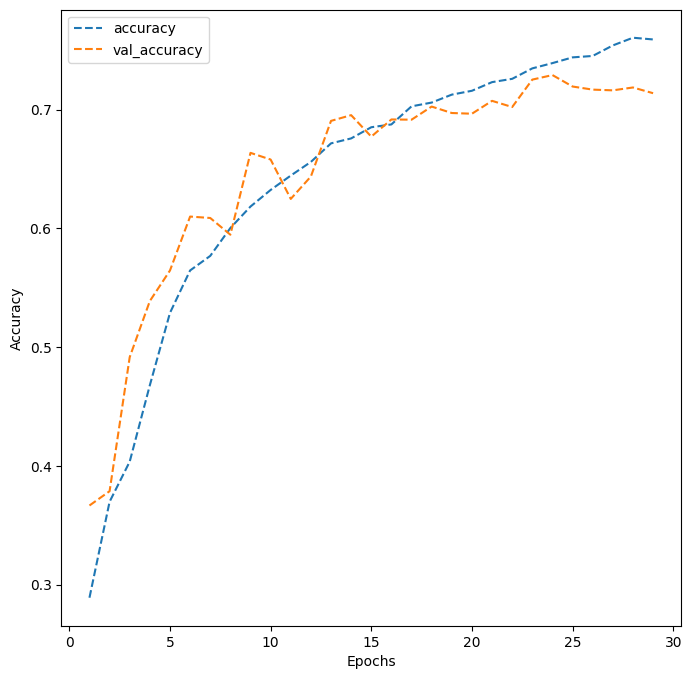

In [146]:
# Plotting the accuracies

dict_hist = history_model.history

list_ep = [i for i in range(1, 30)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.62      0.72      0.67        32
           2       0.59      0.59      0.59        32
           3       0.96      0.78      0.86        32

    accuracy                           0.73       128
   macro avg       0.75      0.73      0.74       128
weighted avg       0.75      0.73      0.74       128



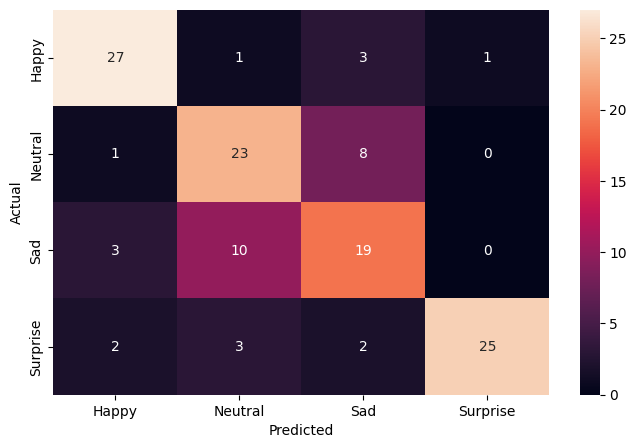

In [147]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_images, test_labels = next(test_set3)
accuracy = model.evaluate(test_images, test_labels)
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

For model 6b, batch size of 64 is applied. The model has training accuracy of 75.92%(slightly better than the previous model with batch size of 32, for 6a: training accuracy = 72.23%) and the validation accuracy of 71.39%(slightly better, for 6a: validation accuracy =69.10%). Also, the model is not overfitting. For the test results, the test accuracy of this model is 73%(slightly off than 6a,74%) with avg F1 score of 0.74(similar as 6a,0.74). However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.67 and 0.59, respectively. 

In the next model 6c, we will decrease the batch size and a batch size of 16 will be used to observe the model performance for the complex neural network models.



## **Model 6c: Decreasing the batch size: batch size = 16**

In [148]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [149]:
#Creating training, validation and test image data generator using color_mode = 'grayscale'

batch_size  = 16
picture_size = 48

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_set4 = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

validation_set4 = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

test_set4 = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = 128,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [150]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)))
model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 96, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(96,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(160,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [151]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        8256      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        1

In [152]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 30

In [153]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_model = model.fit(train_set4, validation_data = validation_set4,epochs=30,callbacks = callbacks_list)

Epoch 1/30
943/945 [============================>.] - ETA: 0s - loss: 1.3765 - accuracy: 0.2947

945/945 [==============================] - 25s 23ms/step - loss: 1.3760 - accuracy: 0.2949 - val_loss: 1.2880 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 2/30
942/945 [============================>.] - ETA: 0s - loss: 1.2586 - accuracy: 0.3886

945/945 [==============================] - 24s 26ms/step - loss: 1.2585 - accuracy: 0.3888 - val_loss: 1.1790 - val_accuracy: 0.4772 - lr: 0.0010
Epoch 3/30
943/945 [============================>.] - ETA: 0s - loss: 1.1336 - accuracy: 0.4858

945/945 [==============================] - 17s 18ms/step - loss: 1.1338 - accuracy: 0.4859 - val_loss: 1.1115 - val_accuracy: 0.5256 - lr: 0.0010
Epoch 4/30
944/945 [============================>.] - ETA: 0s - loss: 1.0464 - accuracy: 0.5416

945/945 [==============================] - 23s 24ms/step - loss: 1.0466 - accuracy: 0.5414 - val_loss: 0.9750 - val_accuracy: 0.5927 - lr: 0.0010
Epoch 5/30
941/945 [============================>.] - ETA: 0s - loss: 0.9973 - accuracy: 0.5655

945/945 [==============================] - 16s 17ms/step - loss: 0.9972 - accuracy: 0.5657 - val_loss: 0.9770 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/30
943/945 [============================>.] - ETA: 0s - loss: 0.9618 - accuracy: 0.5829

945/945 [==============================] - 16s 17ms/step - loss: 0.9619 - accuracy: 0.5829 - val_loss: 0.9181 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 7/30
941/945 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.6053

945/945 [==============================] - 16s 17ms/step - loss: 0.9293 - accuracy: 0.6051 - val_loss: 0.9357 - val_accuracy: 0.6132 - lr: 0.0010
Epoch 8/30
944/945 [============================>.] - ETA: 0s - loss: 0.9042 - accuracy: 0.6206

945/945 [==============================] - 19s 20ms/step - loss: 0.9042 - accuracy: 0.6206 - val_loss: 0.9020 - val_accuracy: 0.6490 - lr: 0.0010
Epoch 9/30
943/945 [============================>.] - ETA: 0s - loss: 0.8776 - accuracy: 0.6299

945/945 [==============================] - 16s 17ms/step - loss: 0.8772 - accuracy: 0.6300 - val_loss: 0.8609 - val_accuracy: 0.6635 - lr: 0.0010
Epoch 10/30
945/945 [==============================] - ETA: 0s - loss: 0.8681 - accuracy: 0.6391

945/945 [==============================] - 16s 17ms/step - loss: 0.8681 - accuracy: 0.6391 - val_loss: 0.9209 - val_accuracy: 0.6373 - lr: 0.0010
Epoch 11/30
943/945 [============================>.] - ETA: 0s - loss: 0.8399 - accuracy: 0.6512

945/945 [==============================] - 17s 18ms/step - loss: 0.8393 - accuracy: 0.6513 - val_loss: 0.8936 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 12/30
943/945 [============================>.] - ETA: 0s - loss: 0.8213 - accuracy: 0.6613

945/945 [==============================] - 16s 17ms/step - loss: 0.8216 - accuracy: 0.6612 - val_loss: 0.9113 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 13/30
944/945 [============================>.] - ETA: 0s - loss: 0.8075 - accuracy: 0.6699

945/945 [==============================] - 19s 20ms/step - loss: 0.8074 - accuracy: 0.6701 - val_loss: 0.8891 - val_accuracy: 0.6777 - lr: 0.0010
Epoch 14/30
943/945 [============================>.] - ETA: 0s - loss: 0.7970 - accuracy: 0.6723Restoring model weights from the end of the best epoch: 9.



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
945/945 [==============================] - 16s 17ms/step - loss: 0.7978 - accuracy: 0.6720 - val_loss: 0.8685 - val_accuracy: 0.6610 - lr: 0.0010
Epoch 14: early stopping


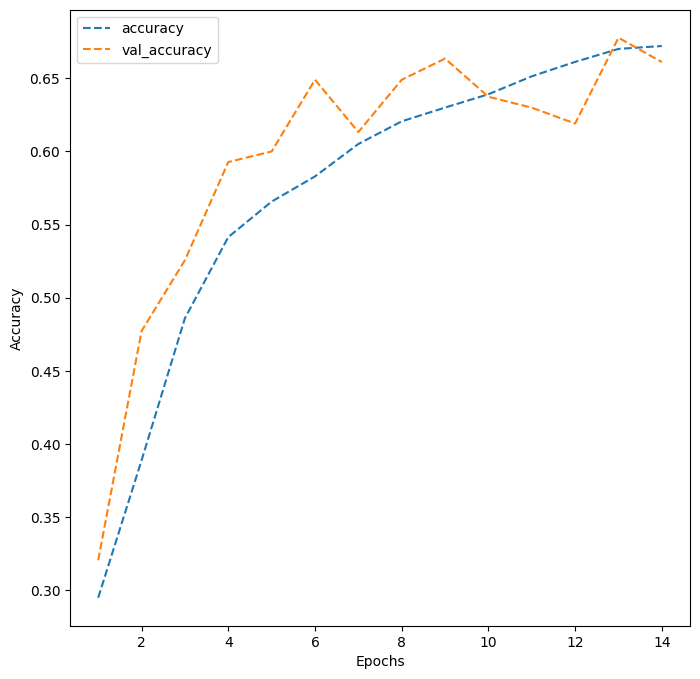

In [154]:
# Plotting the accuracies

dict_hist = history_model.history

list_ep = [i for i in range(1, 15)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

4/4 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.55      0.81      0.66        32
           2       0.67      0.50      0.57        32
           3       1.00      0.81      0.90        32

    accuracy                           0.74       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.77      0.74      0.75       128



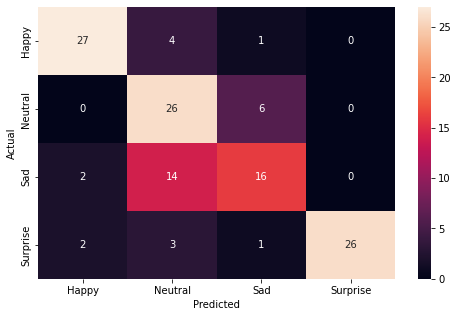

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_images, test_labels = next(test_set4)
accuracy = model.evaluate(test_images, test_labels)
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

For model 6c, batch size of 16 is applied. The model has training accuracy of 67.20% and the validation accuracy of 66.10%. However, the model is not overfitting now. For the test results, the test accuracy of this model is 74%(same as 6a,74%) with avg F1 score of 0.75(slightly better than 6a,0.74). However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.66 and 0.57, respectively. 

**Overall observation:**

Comparing all the above CNN models, model 6a is the well generalized CNN model. Model 6a is selected as the final model with training accuracy of 72.23% and the validation accuracy of 69.10%. 




### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.64      0.78      0.70        32
           2       0.64      0.50      0.56        32
           3       0.93      0.84      0.89        32

    accuracy                           0.74       128
   macro avg       0.75      0.74      0.74       128
weighted avg       0.75      0.74      0.74       128



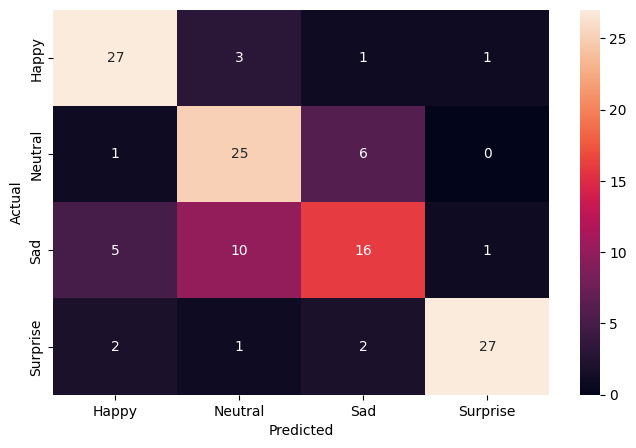

In [139]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#test_images, test_labels = next(test_set1)
accuracy = model.evaluate(test_images, test_labels)
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'], yticklabels = ['Happy', 'Neutral', 'Sad', 'Surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**
For model 6a, batch size of 32 is applied. For the test results, the test accuracy of this model is 74% with avg F1 score of 0.74. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.70 and 0.56, respectively.

## **Conclusion:**

In this facial emotion detection project, we have developed various CNN models (simple, transfer learning and complex) for training purposes and then used those models to observe the accuracies to detect those emotions. In total, we have used 17 different configuration CNN models. Out of 17 models, CNN model with 5 convolutional blocks for feature selection and 3 dense layers for the classification (Model 6a) works best so far. 

For model 6a, batch size of 32 is applied. The model has achieved a training accuracy of 72.23% and the validation accuracy of 69.10%. The model is well generalized. For the test results, the test accuracy of this model is 74% with avg F1 score of 0.74. However, the model exhinits poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.70 and 0.56, respectively.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

Ans: The dataset contains four different classes (happy, neutral,sad and surprise). All the images are in the grayscale.
* On visual inspection, for most of the happy face images, we can see the teeth and fluffy (pushed up) cheeks.Neutral images contain mixed features: some shows happy face and some has widened closed lips.Sad images have slightly pulled down of lips in the corners, wrinkles in the forehead and inner corner of the eyebrows close to each other.Surprise images have open mouths or raised eyebrows or circular eyeballs (eyes widened).
* However, class distributions are not equally distributed.Total number of images of the 3 classes (Happy:3976, Neutral:3978, Sad:3982) are almost same in the training dataset. However, there is 3173 surprise images in the training dataset. As we can see that 'surprise' data has less frequency (0.21) compared to other 3 (all these are around 0.26). So, we can say that our training dataset is slightly imbalanced due to the 'surprise' dataset.
* However, as our training dataset is slightly imbalanced, it should not be a problem with the current training dataset. So, we trained our models and evaluate the performances using the current training dataset.
* If the dataset is more imbalanced, we could employ oversampling technique for the 'surprise' dataset to make the balanced training dataset and then again train the model and compare the performances.
* Also, there are some poor quality images in the training dataset. For example, some images contain watermarked text, some training images does not have any facial expressions (rather has question marks or cross sign instead of any image).
* Images of neutral and sad faces are pretty much confusing. Therefore, CNN algorithms has faced the difficulty to correctly detect them properly. Therefore, for all the classifiers, F1 scores of neutral and sad emotions are not satisfactory.

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Ans: In this project, we have applied basic ANN, 4 different simple CNN architectures, 3 transfer learning (VGG16, Resnet v2, effectiveNet) on top of our fully connected output layers.

### **Performance Evaluation of models:**

#### **(1) SImple CNN models:**
* Four different combination of simple CNN architectures are applied for the training purposes of the face emotion detection. 
* Relu and leakyRelu activation functions are used for two models of each. 
* However, none of the model performance shows the satisfactory validation and test accuracy results.All four models are overfitting. 
* The best CNN simple model (with 3 convolutional layers and 2 dense layers) has achieved the training accuracy of 92.45% and the validation accuracy of 68.68%. However, the model is overfitting. 
* The model has the test accuracy of this model is 73% with avg F1 score of 0.73. Moreover, the model exhibits poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.68 and 0.64, respectively. 
* The test results show slightly better performance for the relu activation function (model 2d) than the leaky relu activation function (model 2b).


#### **(2) Transfer learning based CNN models:**
We used several Transfer Learning architectures. For the pre-trained models, we applied three popular architectures namely, VGG16, ResNet v2, and Efficient Net.

**VGG16 models:** 3 different CNN architectectures on top of the VGG16 transfer layer are employed to observe the performance evaluations.

* **Model 3(a):** In this model, I imported VGG16 upto the layer of 'block5_pool' and then added 2 layers on top of it.The model has training accuracy of 62.01% and the validation accuracy of 56.34%.

* **Model 3(b):** In this model, I imported VGG16 upto the layer of 'block4_pool' and then added 3 layers on top of it.The model has training accuracy of 83.98% and the validation accuracy of 68.86%.

* **Model 3(c):** In this model, I imported VGG16 upto the layer of 'block3_pool' and then added 3 layers on top of it.The model has training accuracy of 80.89% and the validation accuracy of 69.12%.

For the testing purposes, model 3(c) based on the training and validation accuracies was selected. The overall test accuracy of this model is 74% with avg F1 score of 0.74. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.66 and 0.62, respectively. 

**Resnet v2 models:**Three different CNN architectectures on top of the  Resnet v2 transfer layer are used to observe the performance evaluations.  Resnet v2 shows the training, validation and testing accuracies of 25.84%,36.67%, 25%, respectively with avg F1 score of 0.10.

**EffectiveNet models:**Three different CNN architectectures on top of the  EffectiveNet transfer layer are used to observe the performance evaluations.  EffectiveNet shows the training, validation and testing accuracies of  26%,22%, 25%, respectively with avg F1 score of 0.10.

Overall, both Resnet v2 and EffetiveNet models show very poor performance for the facial emotion detection.

* All these transfer learning models are pretrained with RGB images and each filter in these models require 3 channel imputs.These filters try to detect features in channels. However, all the images in our facial emotion recognition dataset are grayscale images with a single channel. As a result, if we use grayscale images for these pretrained models, they will not work well as the filters would not be able to detect features in channels.
* Moreover, even if we expanded the single channel grayscale image to 3 channels, it did not provide any additional information. Therefore, training, validation and test accuracies show very poor performances for the face emotion dataset.

#### **(3) Complex CNN architecture models:**
* For building the complex neural network model, the hyperparameter tuning using random search from the keras tuner was applied to select the building blocks of the complex CNN models. 
* As an optimizer, adam with 3 various learning rates: 0.1,0.01 and 0.001 are used. 
* A layer with 5 convolutional blocks for feature selection and 3 dense layers for the classification are used for the complex CNN models with batch size of 16,32 and 64. 

* Out of three complex CNN models, model 6a(CNN model with 5 convolutional blocks for feature selection and 3 dense layers for the classification, with batch size of 32, learning rate of 0.001 and adam optimizer) shows the best performance.
* The model has obtained a training accuracy of 72.23% and a validation accuracy of 69.10%. The model is not overfitting. 
* Also, the test accuracy of this model is 74% with avg F1 score of 0.74. 
* However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.70 and 0.56, respectively.


#### **Comparision between grayscale vs rgb color mode:**
* From model 1a, with grayscale color mode, we can see that the total trainable parameters are 9,826,308 and total iteration time is 96.8s after early stopping at epoch 7. For rgb model(model_1b), we can see that the total trainable parameters are 9,826,884 with total iteration time is 117.8s.

* Rgb color mode uses 3 channels. So, it generates more parameters and takes more time to train the model compared to the 'grayscale' version. Moreover, even though training accuracy is slightly better for the rgb mode, however, validation, test accuracies and F1 score are slightly better for the 'grayscale' compared to 'rgb'.Therefore, for simple and complex CNN models, we used 'grayscale' color mode option. For the transfer learning models, rgb color mode are used.



### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

Ans: My proposed model for the facial emotion detection is the model 6a (CNN model with 5 convolutional blocks for feature selection and 3 dense layers for the classification, with batch size of 32, learning rate of 0.001 and adam optimizer). The proposed model is well generalized with training, validation and overall test accuracies of 72.23%,69.10% and 74%, respectively.

# Final submission report

## Executive summary:

Q1. What are the most important findings from the analysis done in Milestone? 

Ans: The facial emotion detection project proposes the CNN model for the prediction of facial emotions from the dataset avaliable for this project. The dataset contains the facial emotion images of four different classes (happy, neutral,sad and surprise). All these images are in the grayscale. On visual inspection, most of the happy face images,teeth and fluffy (pushed up) cheeks are visible.Neutral images contain mixed features: some are showing happy face while some images have widened closed lips.Sad images exhibit slightly pulled down of lips in the corners, wrinkles in the forehead and inner corner of the eyebrows close to each other. On the other hand, surprise images have open mouths or raised eyebrows or circular eyeballs (eyes widened).

Moreover, class distributions of these four classes are slightly imbalanced for the training and validation datasets.For instance, training images of 'surprise' data has less frequency (0.21) compared to other 3 (all these are around 0.26).Moreover, some low resolution images are present in the training dataset. For example, some images contain watermarked text, some training images does not have any facial expressions (rather has question marks or cross sign instead of any image).Images of neutral and sad faces are pretty much confusing. Therefore, CNN algorithms have faced the difficulty to correctly detect them properly. Therefore, for all the classifiers, F1 scores of neutral and sad emotions are not satisfactory.

Comparision between grayscale vs rgb color mode:
Rgb color mode uses 3 channels. So, it generates more parameters and takes more time to train the model compared to the 'grayscale' version. Moreover, even though training accuracy is slightly better for the rgb mode, however, validation, test accuracies and F1 score are slightly better for the 'grayscale' compared to 'rgb'.Therefore, for simple and complex CNN models,  'grayscale' color mode option is used. For the transfer learning models, rgb color mode are used.


Comparison of various techniques and their relative performance:
In this project, we have applied basic ANN, four different simple CNN architectures, three transfer learning (VGG16, Resnet v2, effectiveNet) on top of our fully connected output layers.

SImple CNN models:
Four different combination of simple CNN architectures are applied for the training purposes of the face emotion detection.
However, none of the model performance shows the satisfactory validation and test accuracy results.All four models are overfitting. The best CNN simple model (with 3 convolutional layers and 2 dense layers) has achieved the training accuracy of 92.45% and the validation accuracy of 68.68%. However, the model is overfitting.The model has the test accuracy of this model is 73% with avg F1 score of 0.73. Moreover, the model exhibits poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.68 and 0.64, respectively.

Transfer learning based CNN models:
For the pre-trained models, three popular architectures namely, VGG16, ResNet v2, and Efficient Net are applied to observe the performance evaluations.
VGG16 models (imported VGG16 upto the layer of 'block3_pool' and then added 3 layers on top of it) has training accuracy of 80.89% and the validation accuracy of 69.12% with the overall test accuracy of this model is 74% with avg F1 score of 0.74. However, the model has still poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.66 and 0.62, respectively. On the other hand, both Resnet v2 and EffetiveNet models show very poor performance for the facial emotion detection.

All these transfer learning models are pretrained with RGB images and each filter in these models require 3 channel imputs.These filters try to detect features in channels. However, all the images in our facial emotion recognition dataset are grayscale images with a single channel. As a result, if we use grayscale images for these pretrained models, they will not work well as the filters would not be able to detect features in channels.Moreover, even if we expanded the single channel grayscale image to 3 channels, it did not provide any additional information. Therefore, training, validation and test accuracies show very poor performances for the face emotion dataset.




Q2. Describe the final proposed model specifications?

Ans: The final proposed model for the facial emotion detection is the model 6a.This proposed CNN model is composed of five convolutional layers (C1 - C5) with 32,64,64,96,32 filters used, respectively with the filter kernel size of 2 by 2, three maximum pooling layers (P1- P3) of 2 by 2, three batch normalization (B1 - B3), and three dropout layers (D1-D3) that are used for feature selection. These layers are arranged in the form of C1-C2-P1-B1-D1-C3-C4-P2-B2-D2-C5-P3-B3-D3.Moreover, a fully connected single-layer perceptron (flatten layer,F)is placed after the D3 layer along with three dense layers (E1 - E3) of 96,32 and 160 layers, respectively, three more dropout layers (D4 - D6) which are arranged in the form of F-E1-D4-E2-D5-E6-D6 and finally the output layer.The final output is a 4-dimensional vector for the four facial emotions detection, where the softmax function is used for the multi-label classification. The final proposed model uses batch size of 32, relu activation function and adam optimizer with learning rate of 0.001. The model architecture has 182,340 total parameters (Trainable parameters: 181,956 and Non-trainable parameters: 384). 


## Problem and solution summary:

Q3. Provide the summary of the problem? State the reasons for the proposed solution design? How it would affect the problem/business?

Ans:Facial emotions and their analysis are essential for detecting and understanding human behavior, personality, mental state, etc. Most people can recognize facial emotions quickly regardless of gender, race, and nationality. However, extracting features from face-to-face is a challenging, complicated, and sensitive task for the computer vision techniques, such as deep learning, image processing, and machine learning to perform automated facial emotion recognition and classification. Some key challenges in extracting features from the facial image dataset include a variation of head pose, resolution and size of the image, background, and presence of other objects (hand, ornaments, eyeglasses, etc).In recent years, deep learning has become an efficient approach with the implementation of various architectures which allow the automatic extraction of features and classification using convolutional neural network (CNN), transfer learning, and recurrent neural network (RNN). This project aims to build a CNN model for facial emotion detection accurately.

The proposed CNN model performs multi-class classification on images of facial emotions to classify the expressions according to the associated emotion.

In this facial emotion detection project, various CNN models (simple, transfer learning and complex) are employed for training, validation and testing to observe the accuracies to detect those emotions. In total, 17 different configuration CNN models are applied and evaluated. Simple and transfer learning CNN models are overfitting and has low F1 score. 

For building the proposed CNN model, the hyperparameter tuning using random search from the keras tuner was applied to select the building blocks of the complex CNN models. As an optimizer, adam with three various learning rates: 0.1,0.01 and 0.001 are used. A layer with five convolutional blocks for feature selection and three dense layers for the classification are used for the complex CNN models with batch size of 16,32 and 64. Out of three complex CNN models, model 6a(CNN model with five convolutional blocks for feature selection and three dense layers for the classification, with batch size of 32, learning rate of 0.001 and adam optimizer) shows the best performance. Model 6a is selected as the final proposed CNN model for the face emotion detection. 

The final proposed model solved the overfitting problem and is well generalized and optimized with training, validation and overall test accuracies of 72.23%,69.10% and 74%, respectively. This model has achieved an average F1 score of 0.74. Batch normalization and drop out are used to solve the overfitting problem.

However, the model has poor performance for detecting class-1 (neutral) and class-2 (sad) with F1 score of 0.70 and 0.56, respectively.



## Recommendations for implementation: 

Q4. What are some key recommendations to implement the solution? What are the key actionables for stakeholders? What is the expected benefit and/or costs (List the benefits of the solution. State some rational assumptions to put forward some numbers on costs/benefits for stakeholders)? What are the potential risks or challenges of the proposed solution design? What further analysis needs to be done or what other associated problems need to be solved?

Ans:However, it is subject to a number of limitations, including a lack of consideration for ethical issues for using public images, low image resolution, presence of hand gestures in some of these images. 

Key recommendations and future implementation:

1. Training dataset is slightly imbalanced. However, validation dataset is pretty much imbalanced.Total number of images of the four classes (Happy:1825, Neutral:1216, Sad:1139, Surprises:797) in the validation dataset.  As we can see that 'surprise' and data has less frequency (0.16) compared to other three emotions. So, validation dataset is imbalanced due to the 'surprise' dataset. We could employ oversampling technique for the 'surprise' dataset to make the balanced dataset and then again train the model and compare the performances.
2. Also, there are some poor quality images in the training dataset. For example, some images contain watermarked text, some training images does not have any facial expressions (rather has question marks or cross sign instead of any image).Images of neutral and sad faces are pretty much confusing. Therefore, CNN algorithms has faced the difficulty to correctly detect them properly. Therefore, for all the classifiers, F1 scores of neutral and sad emotions are not satisfactory.
3. The dataset is pretty small. Data augmentation can be applied to generate a large volume of training dataset by using the transformations of the face images, such as flip, shift, scaling, and rotation. 
4.  Several experiments needs to be carried out with mode convolutional layers (such as 6 or more layers) to verify the effectiveness of the augmented dataset, and the performance of these approached CNN models in comparison with some of the frequently used face recognition methods.
5. The proposed CNN model was implemented using GPU. Using more deeper convolutional layers with millions to trillions of training dataset may increase the implementation cost.
6. Several other transfer learning models can be applied to improve the performance of the facial recognition.


It is recommended that stakeholders consider these variables in building improved long-term facial emotion detection models, as well as include the full range of environmental implications of various data sources, usage of color images instead of grayscale images, usage of more training data in developing future facial emotion detection.


